# Import Data

First date of training dataset:  2010-01-04 00:00:00
Last date of training dataset:  2019-02-08 00:00:00
len of training dataset:  2291

First date of validation dataset:  2019-02-11 00:00:00
Last date of validation dataset:  2021-09-14 00:00:00
len of validation dataset:  654

First date of test dataset:  2021-09-15 00:00:00
Last date of test dataset:  2022-12-30 00:00:00
len of test dataset:  327

total dataset lenght:  3272
sum of the three datasets:  3272
original returns dataframe dimension: (3272, 3)


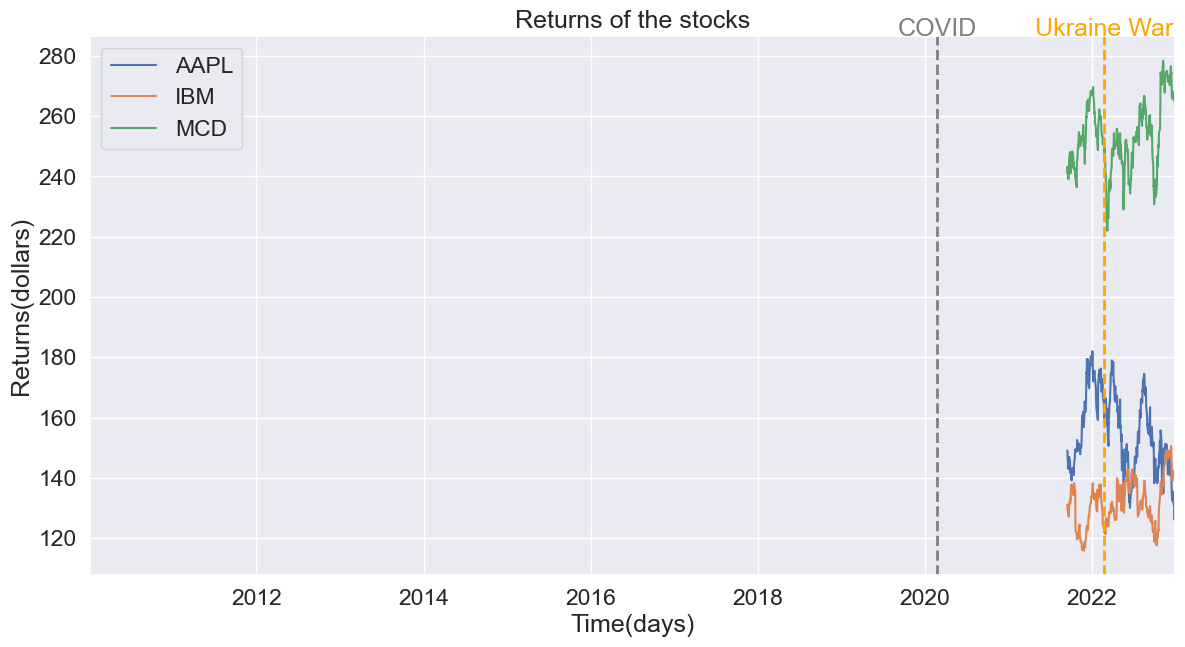

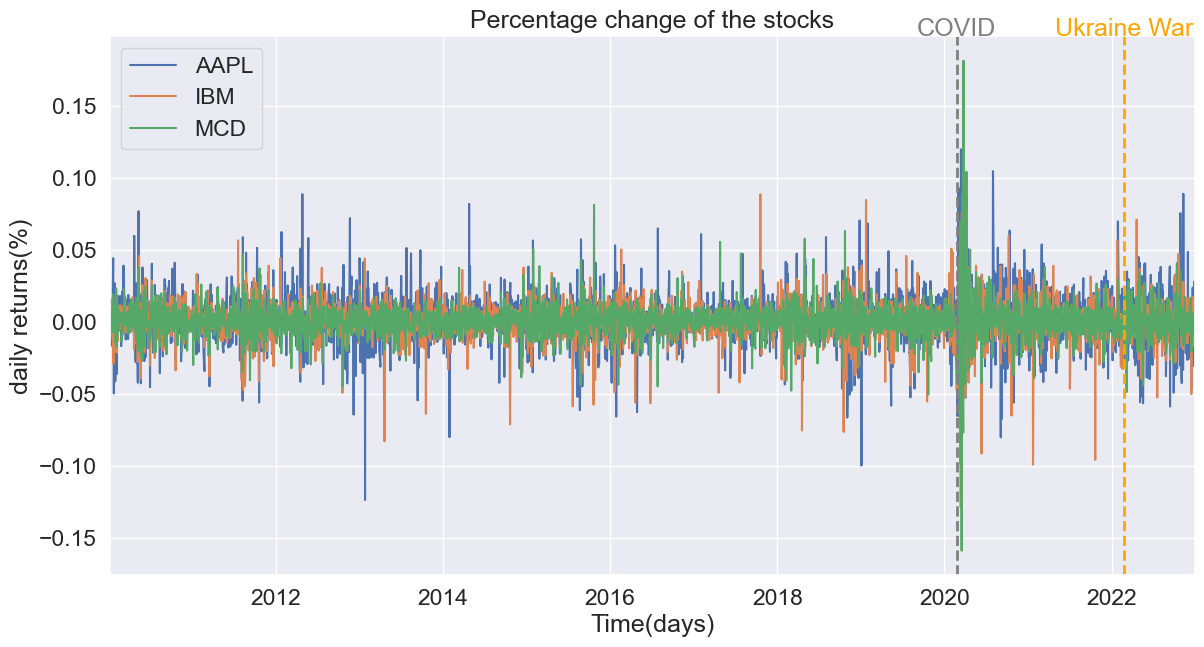

2010-01-04 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-05 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-06 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-07 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-08 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
dimension of the prescient dictionary: 3272
2010-01-04 00:00:00
          7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0

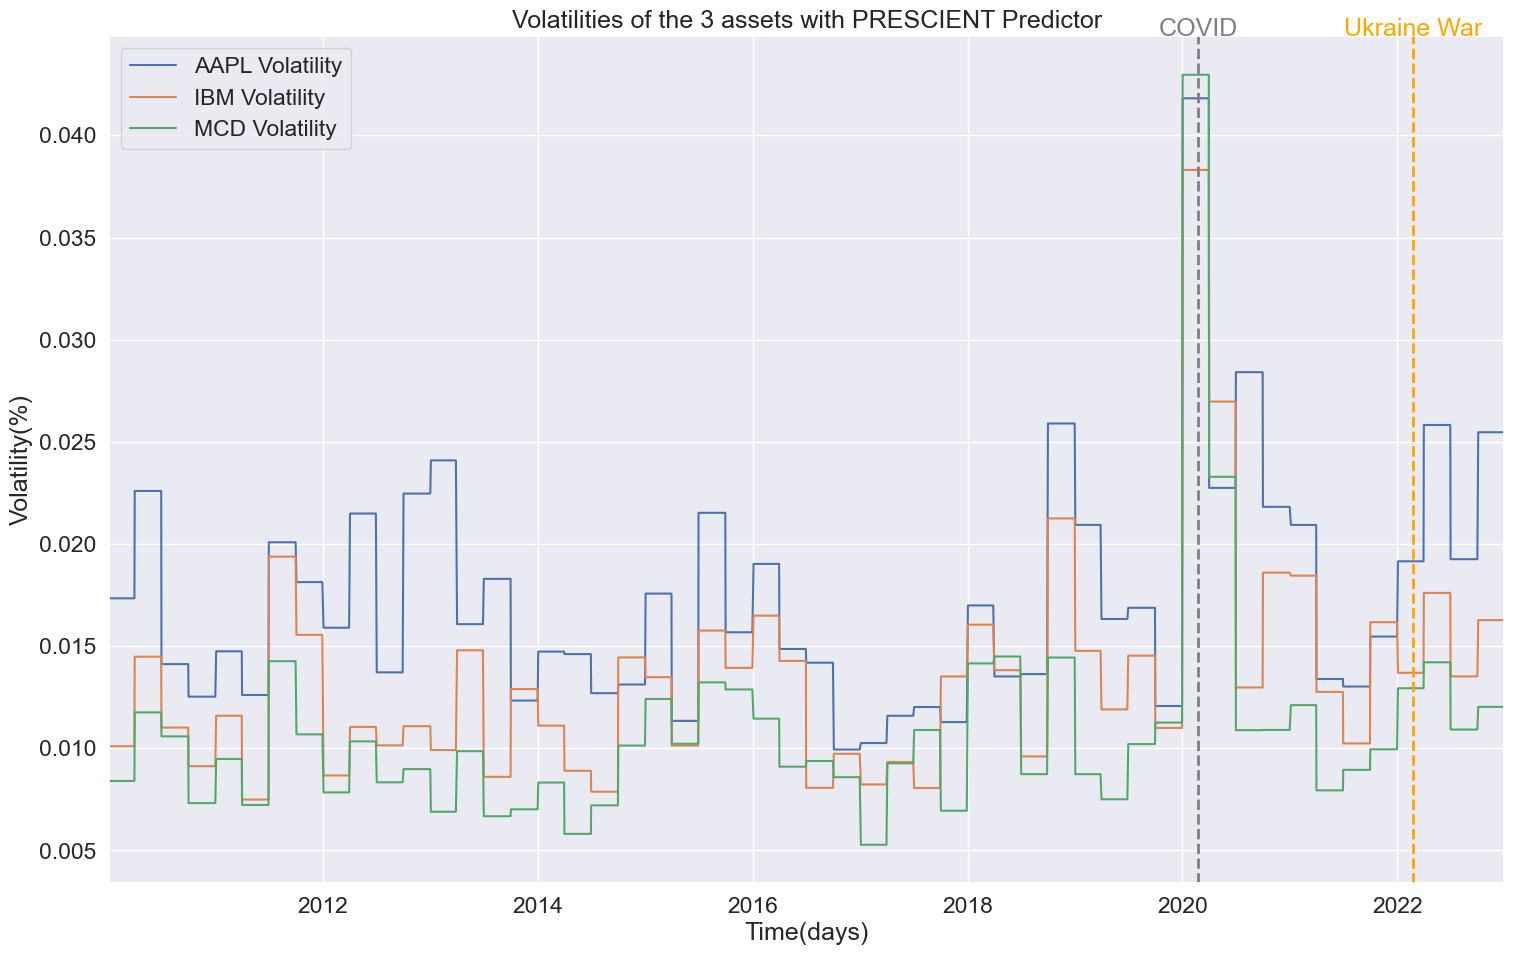

In [1]:
from cvx.covariance.ewma import iterated_ewma, _ewma_cov, _ewma_mean
from cvx.covariance.combination import from_sigmas

from predictorStarter import * # this file contains the import of every dataset, libraries needed and the initial plotting of the data
from predictorsImplementation import * # this file contains the implementation of the predictors ( one function implementation for each predictor)

import cvxpy as cp
from pandas.tseries.offsets import BDay

recover the list of volatilities, log likelihood, regret ecc

In [2]:
# these are all dictionaries that contain the volatility predictions for each predictor; every dictionaries contains the volatility predcitions for each stock(AAPL,IBM,MCD)

%store -r rw_volatilities
%store -r ewma_volatilities
%store -r mgarch_volatilities
%store -r hybrid_rw_volatilities
%store -r hybrid_ewma_volatilities
%store -r hybrid_mgarch_volatilities
%store -r real_volatilities

# assert that every dictionaries have the same length
assert len(rw_volatilities['AAPL']) == len(ewma_volatilities['AAPL']) == len(mgarch_volatilities['AAPL']) == len(hybrid_rw_volatilities['AAPL']) == len(hybrid_ewma_volatilities['AAPL']) == len(hybrid_mgarch_volatilities['AAPL']) == len(real_volatilities['AAPL'])

print("length of the dictionary is: ", rw_volatilities)

# assert that the keys of the dictionaries are the same
assert rw_volatilities.keys() == ewma_volatilities.keys() == mgarch_volatilities.keys() == hybrid_rw_volatilities.keys() == hybrid_ewma_volatilities.keys() == hybrid_mgarch_volatilities.keys() == real_volatilities.keys()

print("keys of the dictionary are: ", rw_volatilities.keys())

# assert that every key of the dictionary has 308 elements
for key in rw_volatilities.keys():
    assert len(rw_volatilities[key]) == len(ewma_volatilities[key]) == len(mgarch_volatilities[key]) == len(hybrid_rw_volatilities[key]) == len(hybrid_ewma_volatilities[key]) == len(hybrid_mgarch_volatilities[key]) == len(real_volatilities[key])

print("shape of the dictionary is: ", len(rw_volatilities['AAPL']))

# assert that every key of every dictionary starts with the same timestamp
for key in rw_volatilities.keys():
    assert next(iter(rw_volatilities[key])) == next(iter(ewma_volatilities[key])) == next(iter(mgarch_volatilities[key])) == next(iter(hybrid_rw_volatilities[key])) == next(iter(hybrid_ewma_volatilities[key])) == next(iter(hybrid_mgarch_volatilities[key])) == next(iter(real_volatilities[key]))

# print the timestamp of the first element of every dictionary
first_timestamp = next(iter(rw_volatilities['AAPL']))

print("timestamp of the first element of the dictionary is: ", first_timestamp)

# save the start date of the predictions
start_date = first_timestamp
end_date = list(rw_volatilities['AAPL'].keys())[-1]

print("start date of the predictions is: ", start_date)
print("end date of the predictions is: ", end_date)


# calculate the volatility residual for every predictor and for every asset

# AAPL
# Calculate the residuals
rw_residuals_AAPL = {key: real_volatilities["AAPL"][key] - rw_volatilities["AAPL"][key] for key in rw_volatilities["AAPL"]}
ewma_residuals_AAPL = {key: real_volatilities["AAPL"][key] - ewma_volatilities["AAPL"][key] for key in ewma_volatilities["AAPL"]}
mgarch_residuals_AAPL = {key: real_volatilities["AAPL"][key] - mgarch_volatilities["AAPL"][key] for key in mgarch_volatilities["AAPL"]}
hybrid_rw_residuals_AAPL = {key: real_volatilities["AAPL"][key] - hybrid_rw_volatilities["AAPL"][key] for key in hybrid_rw_volatilities["AAPL"]}
hybrid_ewma_residuals_AAPL = {key: real_volatilities["AAPL"][key] - hybrid_ewma_volatilities["AAPL"][key] for key in hybrid_ewma_volatilities["AAPL"]}
hybrid_mgarch_residuals_AAPL = {key: real_volatilities["AAPL"][key] - hybrid_mgarch_volatilities["AAPL"][key] for key in hybrid_mgarch_volatilities["AAPL"]}

# IBM
rw_residuals_IBM = {key: real_volatilities["IBM"][key] - rw_volatilities["IBM"][key] for key in rw_volatilities["IBM"]}
ewma_residuals_IBM = {key: real_volatilities["IBM"][key] - ewma_volatilities["IBM"][key] for key in ewma_volatilities["IBM"]}
mgarch_residuals_IBM = {key: real_volatilities["IBM"][key] - mgarch_volatilities["IBM"][key] for key in mgarch_volatilities["IBM"]}
hybrid_rw_residuals_IBM = {key: real_volatilities["IBM"][key] - hybrid_rw_volatilities["IBM"][key] for key in hybrid_rw_volatilities["IBM"]}
hybrid_ewma_residuals_IBM = {key: real_volatilities["IBM"][key] - hybrid_ewma_volatilities["IBM"][key] for key in hybrid_ewma_volatilities["IBM"]}
hybrid_mgarch_residuals_IBM = {key: real_volatilities["IBM"][key] - hybrid_mgarch_volatilities["IBM"][key] for key in hybrid_mgarch_volatilities["IBM"]}

# MCD
rw_residuals_MCD = {key: real_volatilities["MCD"][key] - rw_volatilities["MCD"][key] for key in rw_volatilities["MCD"]}
ewma_residuals_MCD = {key: real_volatilities["MCD"][key] - ewma_volatilities["MCD"][key] for key in ewma_volatilities["MCD"]}
mgarch_residuals_MCD = {key: real_volatilities["MCD"][key] - mgarch_volatilities["MCD"][key] for key in mgarch_volatilities["MCD"]}
hybrid_rw_residuals_MCD = {key: real_volatilities["MCD"][key] - hybrid_rw_volatilities["MCD"][key] for key in hybrid_rw_volatilities["MCD"]}
hybrid_ewma_residuals_MCD = {key: real_volatilities["MCD"][key] - hybrid_ewma_volatilities["MCD"][key] for key in hybrid_ewma_volatilities["MCD"]}
hybrid_mgarch_residuals_MCD = {key: real_volatilities["MCD"][key] - hybrid_mgarch_volatilities["MCD"][key] for key in hybrid_mgarch_volatilities["MCD"]}


# calculate the absolute residuals for every predictor and for every asset, and the sum of the residuals

# AAPL
abs_rw_residuals_AAPL = pd.Series(rw_residuals_AAPL).abs()
sum_rw_residuals_AAPL = abs_rw_residuals_AAPL.sum()

abs_ewma_residuals_AAPL = pd.Series(ewma_residuals_AAPL).abs()
sum_ewma_residuals_AAPL = abs_ewma_residuals_AAPL.sum()

abs_mgarch_residuals_AAPL = pd.Series(mgarch_residuals_AAPL).abs()
sum_mgarch_residuals_AAPL = abs_mgarch_residuals_AAPL.sum()

abs_hybrid_rw_residuals_AAPL = pd.Series(hybrid_rw_residuals_AAPL).abs()
sum_hybrid_rw_residuals_AAPL = abs_hybrid_rw_residuals_AAPL.sum()

abs_hybrid_ewma_residuals_AAPL = pd.Series(hybrid_ewma_residuals_AAPL).abs()
sum_hybrid_ewma_residuals_AAPL = abs_hybrid_ewma_residuals_AAPL.sum()

abs_hybrid_mgarch_residuals_AAPL = pd.Series(hybrid_mgarch_residuals_AAPL).abs()
sum_hybrid_mgarch_residuals_AAPL = abs_hybrid_mgarch_residuals_AAPL.sum()

# IBM
abs_rw_residuals_IBM = pd.Series(rw_residuals_IBM).abs()
sum_rw_residuals_IBM = abs_rw_residuals_IBM.sum()

abs_ewma_residuals_IBM = pd.Series(ewma_residuals_IBM).abs()
sum_ewma_residuals_IBM = abs_ewma_residuals_IBM.sum()

abs_mgarch_residuals_IBM = pd.Series(mgarch_residuals_IBM).abs()
sum_mgarch_residuals_IBM = abs_mgarch_residuals_IBM.sum()

abs_hybrid_rw_residuals_IBM = pd.Series(hybrid_rw_residuals_IBM).abs()
sum_hybrid_rw_residuals_IBM = abs_hybrid_rw_residuals_IBM.sum()

abs_hybrid_ewma_residuals_IBM = pd.Series(hybrid_ewma_residuals_IBM).abs()
sum_hybrid_ewma_residuals_IBM = abs_hybrid_ewma_residuals_IBM.sum()

abs_hybrid_mgarch_residuals_IBM = pd.Series(hybrid_mgarch_residuals_IBM).abs()
sum_hybrid_mgarch_residuals_IBM = abs_hybrid_mgarch_residuals_IBM.sum()

# MCD
abs_rw_residuals_MCD = pd.Series(rw_residuals_MCD).abs()
sum_rw_residuals_MCD = abs_rw_residuals_MCD.sum()

abs_ewma_residuals_MCD = pd.Series(ewma_residuals_MCD).abs()
sum_ewma_residuals_MCD = abs_ewma_residuals_MCD.sum()

abs_mgarch_residuals_MCD = pd.Series(mgarch_residuals_MCD).abs()
sum_mgarch_residuals_MCD = abs_mgarch_residuals_MCD.sum()

abs_hybrid_rw_residuals_MCD = pd.Series(hybrid_rw_residuals_MCD).abs()
sum_hybrid_rw_residuals_MCD = abs_hybrid_rw_residuals_MCD.sum()

abs_hybrid_ewma_residuals_MCD = pd.Series(hybrid_ewma_residuals_MCD).abs()
sum_hybrid_ewma_residuals_MCD = abs_hybrid_ewma_residuals_MCD.sum()

abs_hybrid_mgarch_residuals_MCD = pd.Series(hybrid_mgarch_residuals_MCD).abs()
sum_hybrid_mgarch_residuals_MCD = abs_hybrid_mgarch_residuals_MCD.sum()


# plot the residuals

# Titles for each column
assets = ['AAPL', 'IBM', 'MCD']
predictors = ['RW', 'EWMA', 'MGARCH']
hybrids = ['HYBRID RW', 'HYBRID EWMA', 'HYBRID MGARCH']

# Loop through each asset and plot each type of predictor comparison
for i, asset in enumerate(assets):
    for j, (predictor, hybrid) in enumerate(zip(predictors, hybrids)):
        # Prepare the figure for each comparison
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
        fig.suptitle(f'{asset} - {predictor} vs. {hybrid}')

        # Get absolute residuals for predictor and hybrid
        abs_pred = pd.Series(globals()[f'abs_{predictor.lower()}_residuals_{asset}'])
        abs_hybrid = pd.Series(globals()[f'abs_hybrid_{predictor.lower()}_residuals_{asset}'])

        # Calculate cumulative sums for predictor and hybrid
        cumsum_pred = abs_pred.cumsum()
        cumsum_hybrid = abs_hybrid.cumsum()

        # Plotting the cumulative residuals on the upper subplot
        ax1.plot(cumsum_pred, label=f'{predictor} (Final Sum: {cumsum_pred.iloc[-1]:.2f}%)', color='blue')
        ax1.plot(cumsum_hybrid, label=f'{hybrid} (Final Sum: {cumsum_hybrid.iloc[-1]:.2f}%)', color='red')
        ax1.set_title('Cumulative Volatility Residuals')
        ax1.legend()
        ax1.set_ylabel('Cumulative Absolute Residuals(%)')
        ax1.grid(True)
        # Remove dates from the x-axis
        ax1.set_xticklabels([])  # This removes the x-axis labels
        ax1.set_xlim(start_date, end_date)

        # Plotting the daily absolute residuals on the lower subplot
        ax2.plot(abs_pred, label=f'{predictor}', color='blue')
        ax2.plot(abs_hybrid, label=f'{hybrid}', color='red')
        ax2.set_title('Daily Absolute Volatility Residuals')
        ax2.legend()
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Absolute Volatility Residuals(%)')
        ax2.grid(True)
        ax2.set_xlim(start_date, end_date)

        # Show each plot
        plt.show()

TypeError: 'PickleShareDB' object is not subscriptable

# NOW PLOT MEAN LOGLIKELIHOOD, REGRET AND RMSE

In [ ]:
number_of_stocks = np.array([3, 6, 9])

def plot_metric_with_styles_and_colors(metric_data, title, ylabel):
    plt.figure(figsize=(7, 8))
    
    # Define a color scheme for the models
    colors = {
        'RW': 'tab:blue',
        'EWMA': 'tab:orange',
        'MGARCH': 'tab:green',
        # Assign the same color to hybrid versions
        'H_RW': 'tab:blue',
        'H_EWMA': 'tab:orange',
        'H_MGARCH': 'tab:green',
        'PRESCIENT': 'tab:red',

        # assign color to the improvement of the 3 predictors
        'H_RW_BOOST': 'tab:blue',
        'H_EWMA_BOOST': 'tab:orange',
        'H_MGARCH_BOOST': 'tab:green',
    }
    
    for model, values in metric_data.items():
        linestyle = '--' if 'HYBRID' in model else '-'  # Dashed for hybrid, solid for others
        color = colors[model]  # Get the color for the model
        plt.plot(number_of_stocks, values, marker='o', label=model, linestyle=linestyle, color=color)
    
    # Adjust the y-axis scale
    y_values = [value for values in metric_data.values() for value in values if value]  # Ensure non-empty values
    if y_values:  # Check if y_values is not empty
        y_min, y_max = min(y_values), max(y_values)
        y_buffer = (y_max - y_min) * 0.1  # Adding 10% of the range as a buffer
        plt.ylim([y_min - y_buffer, y_max + y_buffer])

    plt.title(title)
    plt.xlabel('Number of Stocks Considered')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


# there is a different function for loglikelihood because for this metric i have to transfrom the data in a relative scale
def plot_histogram_for_logLikelihood(data, title, yLabelTitle, asset_index):
    '''
    plot histogram for the log likelihood of the predictors
    '''

    # Initialize an array to hold the bar positions
    index = []
    gap = 0.4  # Gap between groups
    current_position = 0

    # Ordered list of predictors with standard and hybrid versions grouped
    if len(data) != 7:
        ordered_predictors = ['H_RW_BOOST', 'H_EWMA_BOOST', 'H_MGARCH_BOOST']
        # Calculate positions
        for i in range(len(ordered_predictors)):
            index.append(current_position)
            # Add a smaller gap for pairs and a larger gap between groups
            if i % 3 == 0 and i != 0:  # Adjust gap for every pair after the first
                current_position += gap / 3
            elif i % 3 != 0:  # No gap within a pair
                current_position += gap / 3  # Larger gap between pairs
            current_position += 1
    else:
        ordered_predictors = ['RW', 'H_RW', 'EWMA', 'H_EWMA', 'MGARCH', 'H_MGARCH', 'PRESCIENT']

        # Calculate positions
        for i in range(len(ordered_predictors)):
            index.append(current_position)
            # Add a smaller gap for pairs and a larger gap between groups
            if i % 2 == 0 and i != 0:  # Adjust gap for every pair after the first
                current_position += gap / 3
            elif i % 2 != 0:  # No gap within a pair
                current_position += gap * 3  # Larger gap between pairs
            current_position += 1

    prescient_value = data['PRESCIENT'][asset_index]  # Get the prescient value for the current asset
    values = np.array([(data[p][asset_index] / prescient_value) * 100 for p in ordered_predictors])  # Calculate relative values

    # Generate a colormap
    colors = cm.viridis(np.linspace(0, 1, len(ordered_predictors)))

    # Plotting bars with colors
    for i, (predictor, value) in enumerate(zip(ordered_predictors, values)):
        plt.bar(index[i], value, 0.8, color=colors[i], label=predictor)

    # Labeling
    plt.xlabel('Predictor')
    plt.ylabel(yLabelTitle)
    plt.title(title)
    plt.xticks(index, ordered_predictors, rotation=45, ha="right")
   # Set y-ticks to include 0, 20, 40, 60, 80, 90, 95, 100
    plt.yticks([0, 20, 40, 60, 80, 90, 95, 100])
    plt.grid(True)
    plt.show()


def plot_histogram(data, title, yLabelTitle, ax, asset_index):
    '''
    Plots a histogram of the data for the given asset index(rmse and regret)
    '''

    # Initialize an array to hold the bar positions
    index = []
    gap = 0.4  # Gap between groups
    current_position = 0

    # Ordered list of predictors with standard and hybrid versions grouped
    if len(data) != 7:
        ordered_predictors = ['H_RW_BOOST', 'H_EWMA_BOOST','H_MGARCH_BOOST']
        # Calculate positions
        for i in range(len(ordered_predictors)):
            index.append(current_position)
            # Add a smaller gap for pairs and a larger gap between groups
            if i % 3 == 0 and i != 0:  # Adjust gap for every pair after the first
                current_position += gap / 3  
            elif i % 3 != 0:  # No gap within a pair
                current_position += gap / 3  # Larger gap between pairs
            current_position += 1
    else:
        ordered_predictors = ['RW', 'H_RW', 'EWMA', 'H_EWMA', 'MGARCH', 'H_MGARCH', 'PRESCIENT']

        # Calculate positions
        for i in range(len(ordered_predictors)):
            index.append(current_position)
            # Add a smaller gap for pairs and a larger gap between groups
            if i % 2 == 0 and i != 0:  # Adjust gap for every pair after the first
                current_position += gap / 3  
            elif i % 2 != 0:  # No gap within a pair
                current_position += gap * 3  # Larger gap between pairs
            current_position += 1
        
    values = np.array([data[p][asset_index] for p in ordered_predictors])

    # Generate a colormap
    colors = cm.viridis(np.linspace(0, 1, len(ordered_predictors)))

    # Plotting bars with colors
    for i, (predictor, value) in enumerate(zip(ordered_predictors, values)):
        ax.bar(index[i], value, 0.8, color=colors[i], label=predictor)

    # Labeling
    ax.set_xlabel('Predictor')
    ax.set_ylabel(yLabelTitle)
    ax.set_title(title)
    ax.set_xticks(index)
    ax.set_xticklabels(ordered_predictors, rotation=45, ha="right")

    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

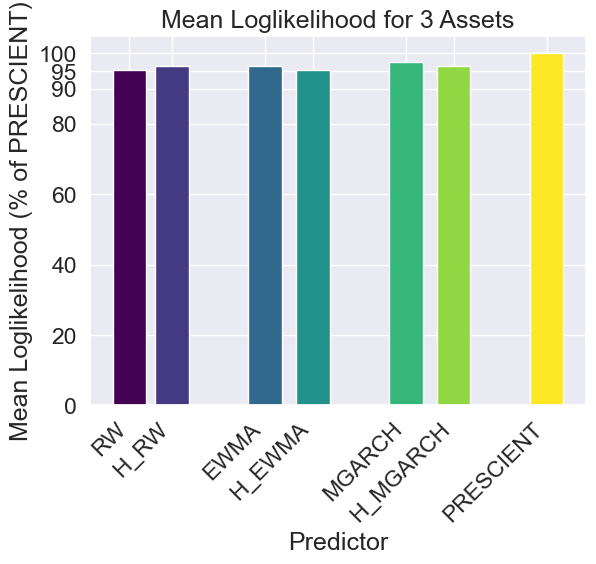

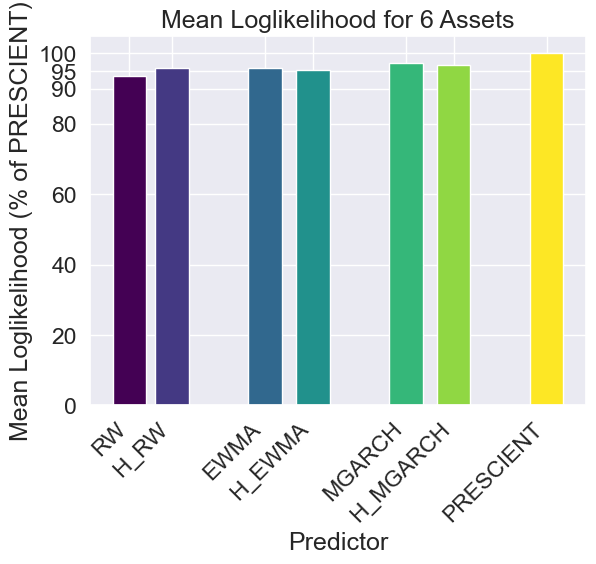

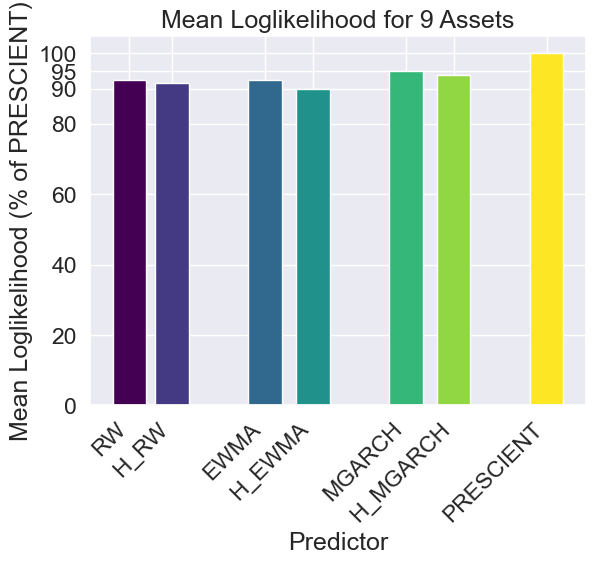

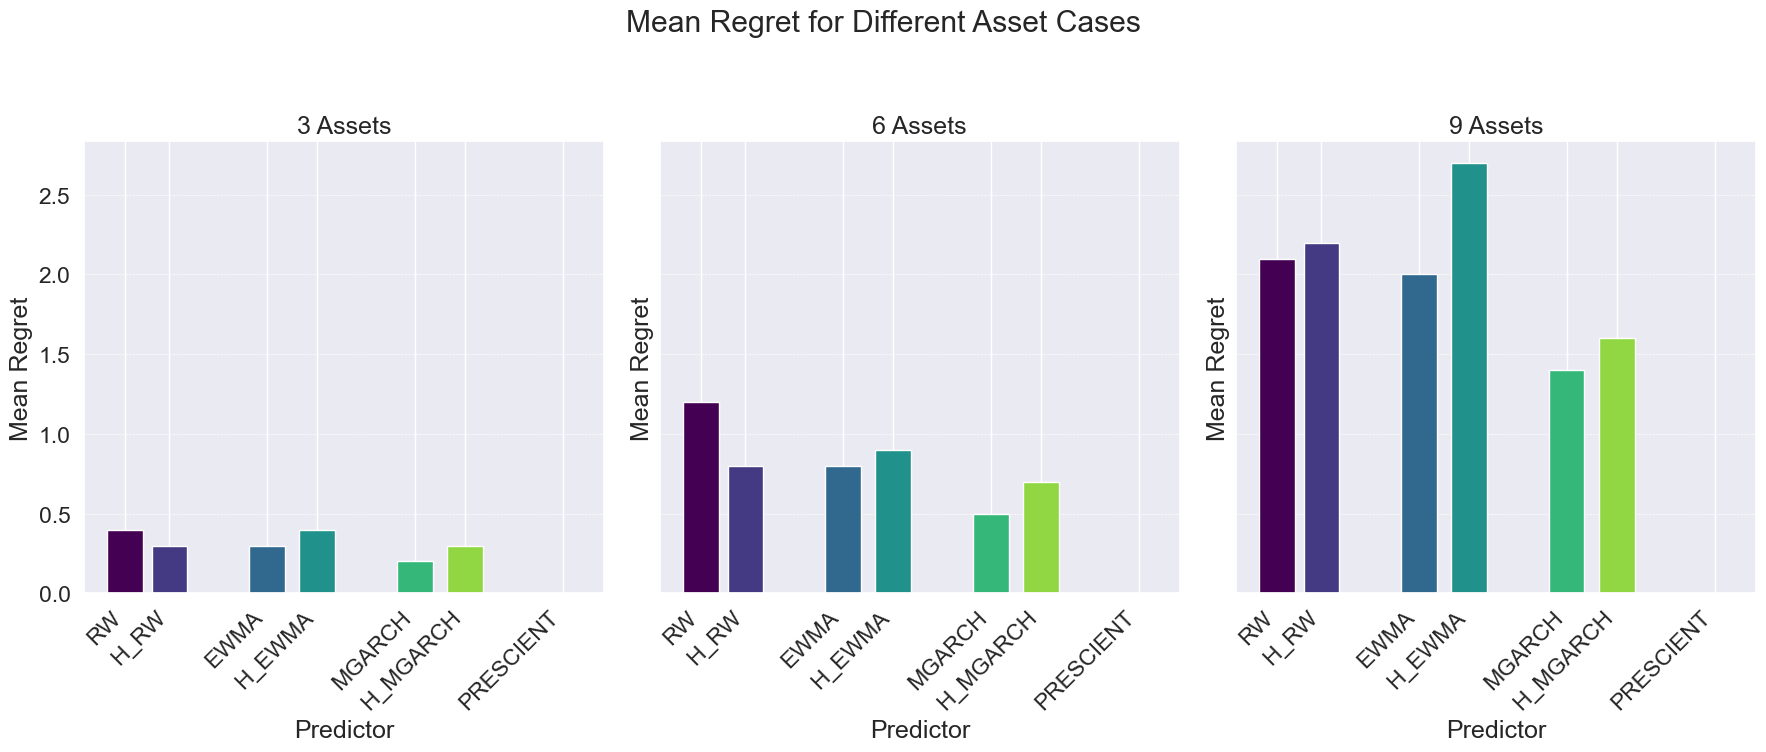

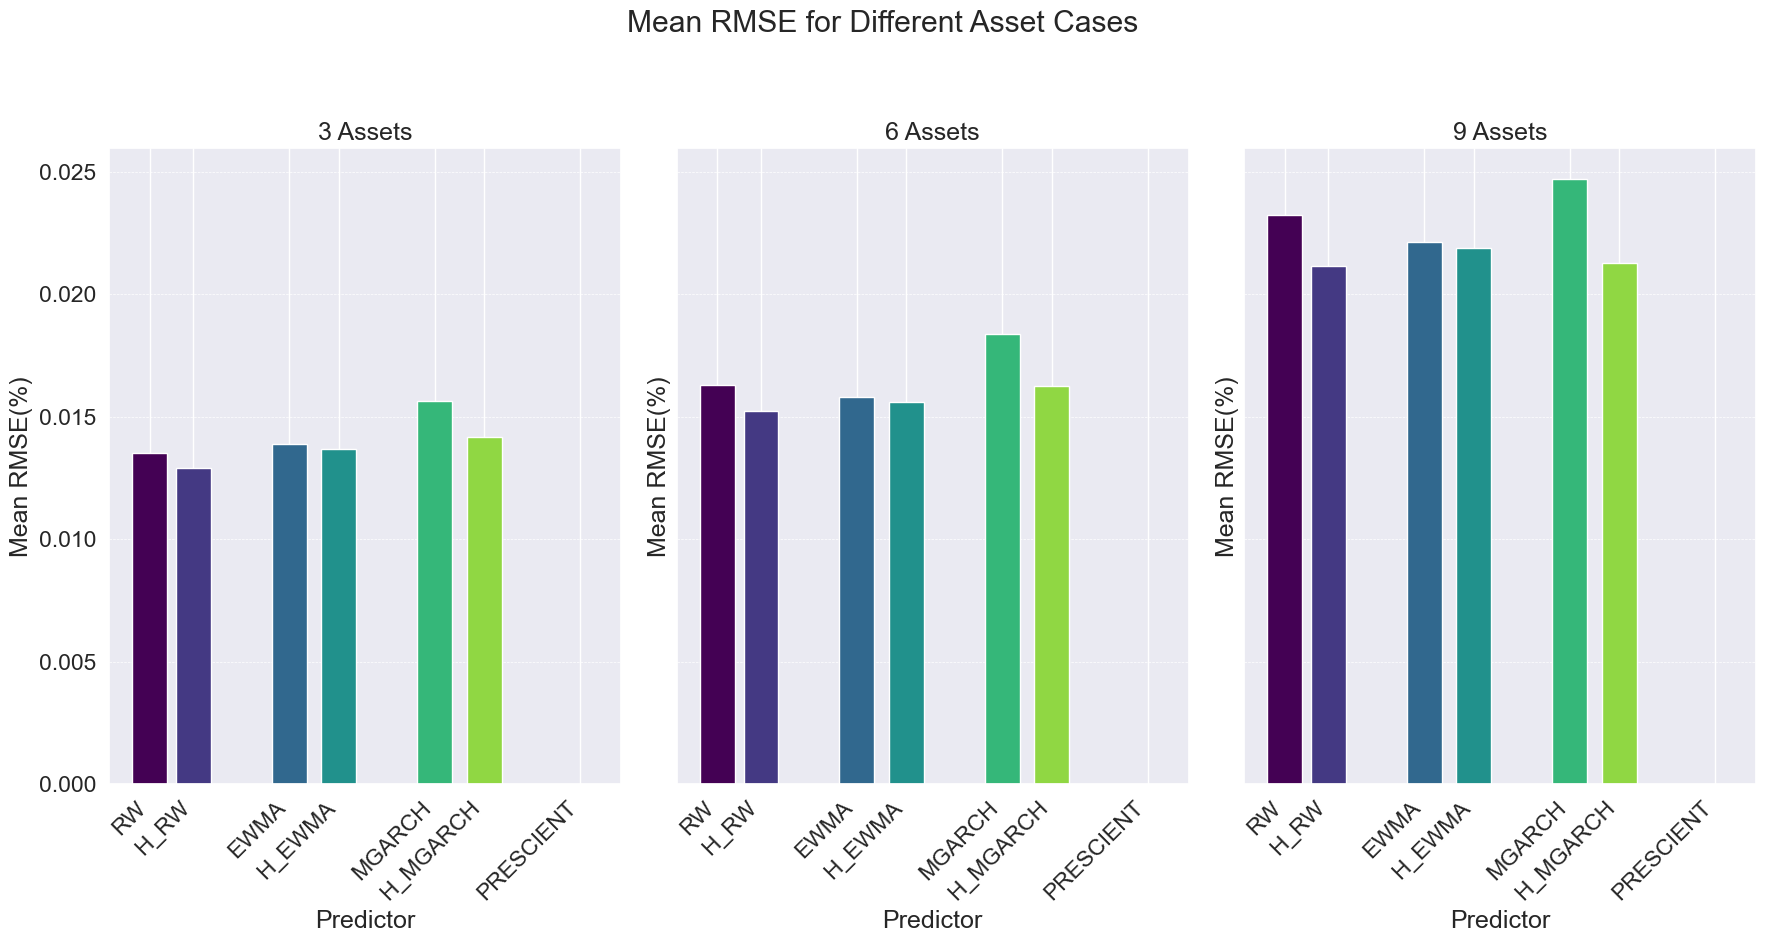

In [ ]:
# Now create individual histograms for mean loglikelihood
for i, asset_count in enumerate(number_of_stocks):
    asset_title = f'{asset_count} Assets'
    plot_histogram_for_logLikelihood(mean_loglikelihood, f'Mean Loglikelihood for {asset_title}', 'Mean Loglikelihood (% of PRESCIENT)', i)


# Creating figure and axes for plotting regret
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
fig.suptitle('Mean Regret for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_regret, '3 Assets', 'Mean Regret', axs[0], 0)
plot_histogram(mean_regret, '6 Assets', 'Mean Regret', axs[1], 1)
plot_histogram(mean_regret, '9 Assets', 'Mean Regret', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting RMSE
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse, '3 Assets', 'Mean RMSE(%)', axs[0], 0)
plot_histogram(mean_rmse, '6 Assets', 'Mean RMSE(%)', axs[1], 1)
plot_histogram(mean_rmse, '9 Assets', 'Mean RMSE(%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Now we want to have a fair comparison, so i measure the rmse between the real and the predicted volatility of apple, ibm and mcd in the case of 3, 6 and 9 assets. then i plot 3 charts with the rmse performance.

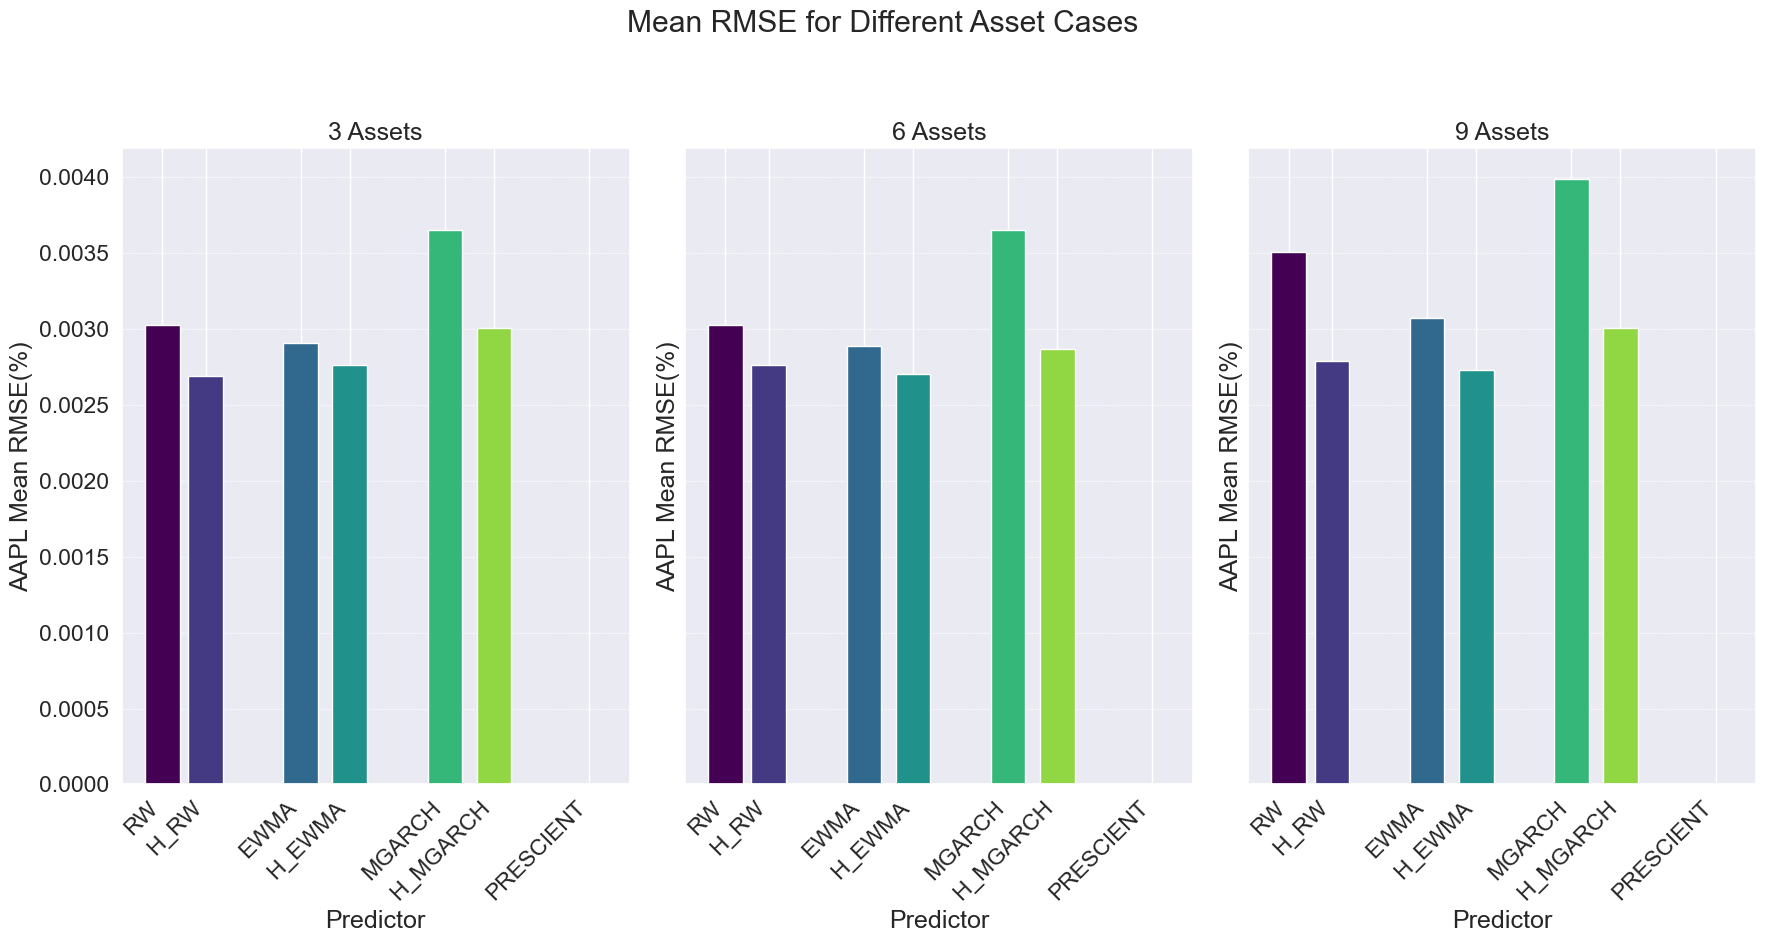

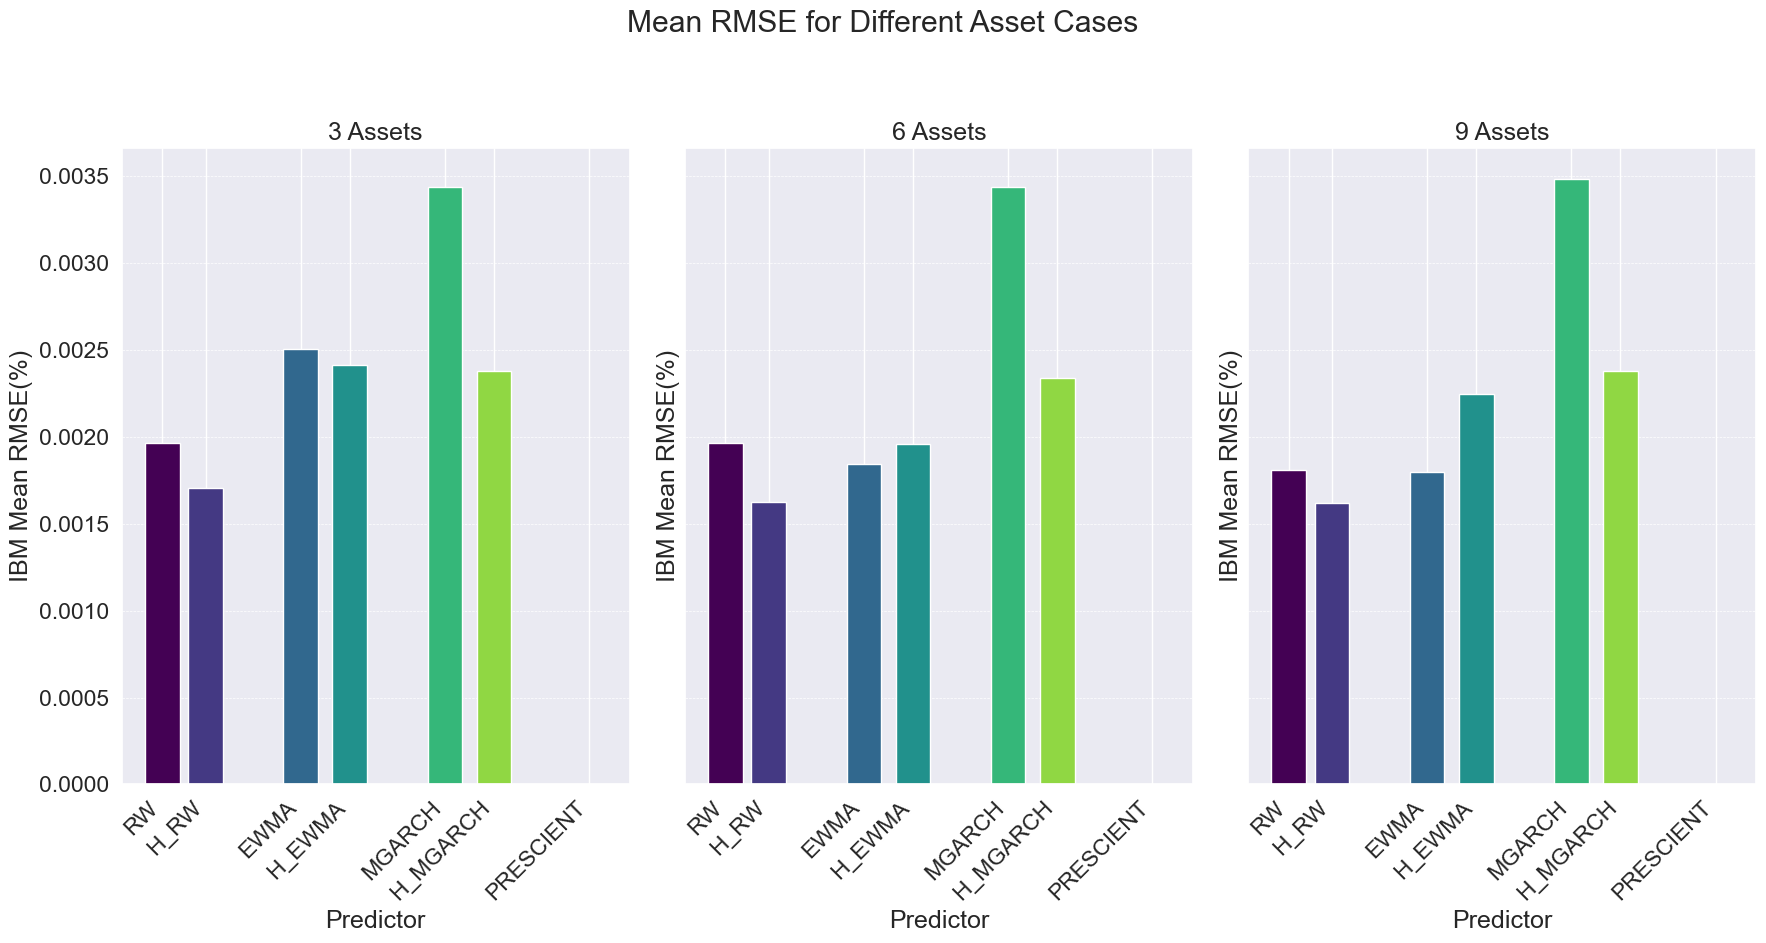

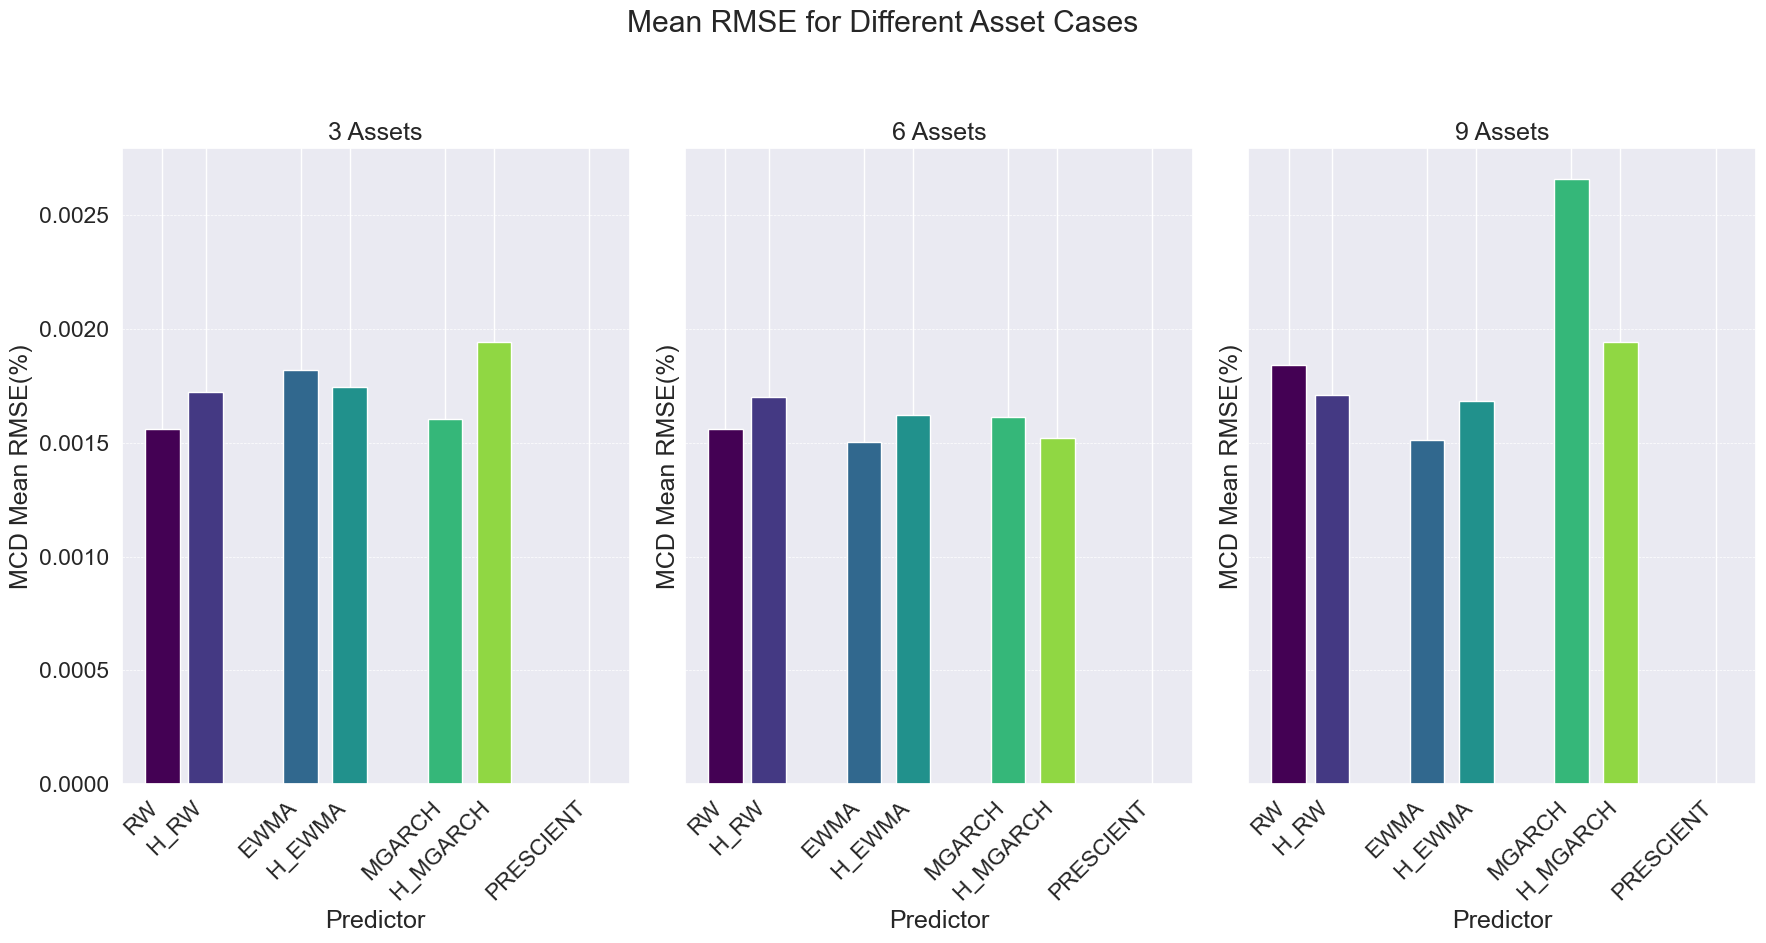

In [ ]:
# Plotting the improved charts for Mean Loglikelihood, Mean Regret, and Mean RMSE
#plot_metric_with_styles_and_colors(mean_rmse_aapl, 'Mean RMSE for Different Predictors', 'AAPL Mean RMSE (in percentage points)')
#plot_metric_with_styles_and_colors(mean_rmse_ibm, 'Mean RMSE for Different Predictors', 'IBM Mean RMSE (in percentage points)')
#plot_metric_with_styles_and_colors(mean_rmse_mcd, 'Mean RMSE for Different Predictors', 'MCD Mean RMSE (in percentage points)')

# Creating figure and axes for plotting Mean rmse aapl
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse_aapl, '3 Assets', 'AAPL Mean RMSE(%)', axs[0], 0)
plot_histogram(mean_rmse_aapl, '6 Assets', 'AAPL Mean RMSE(%)', axs[1], 1)
plot_histogram(mean_rmse_aapl, '9 Assets', 'AAPL Mean RMSE(%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting Mean rmse ibm
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse_ibm, '3 Assets', 'IBM Mean RMSE(%)', axs[0], 0)
plot_histogram(mean_rmse_ibm, '6 Assets', 'IBM Mean RMSE(%)', axs[1], 1)
plot_histogram(mean_rmse_ibm, '9 Assets', 'IBM Mean RMSE(%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting Mean rmse mcd
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse_mcd, '3 Assets', 'MCD Mean RMSE(%)', axs[0], 0)
plot_histogram(mean_rmse_mcd, '6 Assets', 'MCD Mean RMSE(%)', axs[1], 1)
plot_histogram(mean_rmse_mcd, '9 Assets', 'MCD Mean RMSE(%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

mean determinants values:  [8.823212302484815e-12, 1.7118638041617437e-24, 1.8710140288409617e-35]
mean matrix product values:  [3.0019700890236787, 5.970959088030189, 8.959471505947539]
mean loglikelihood values:  [8.516550710705427, 19.029652299330674, 27.675720610189646]


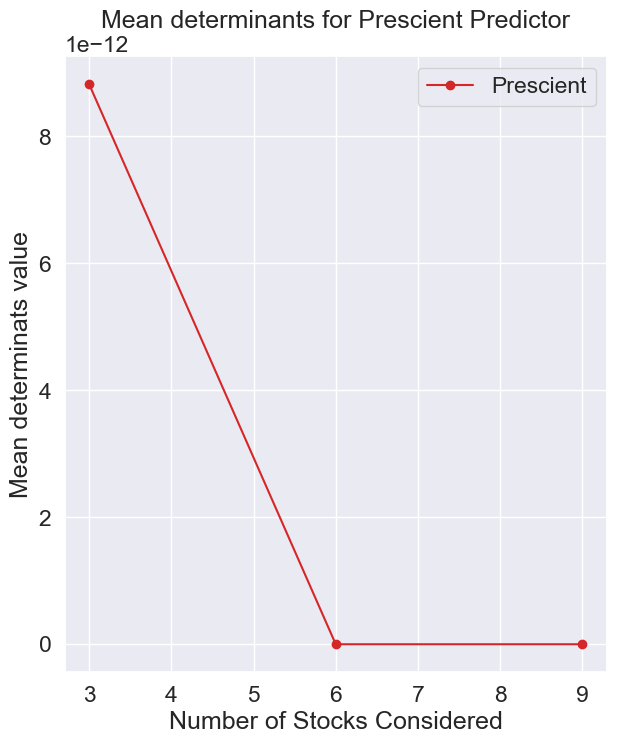

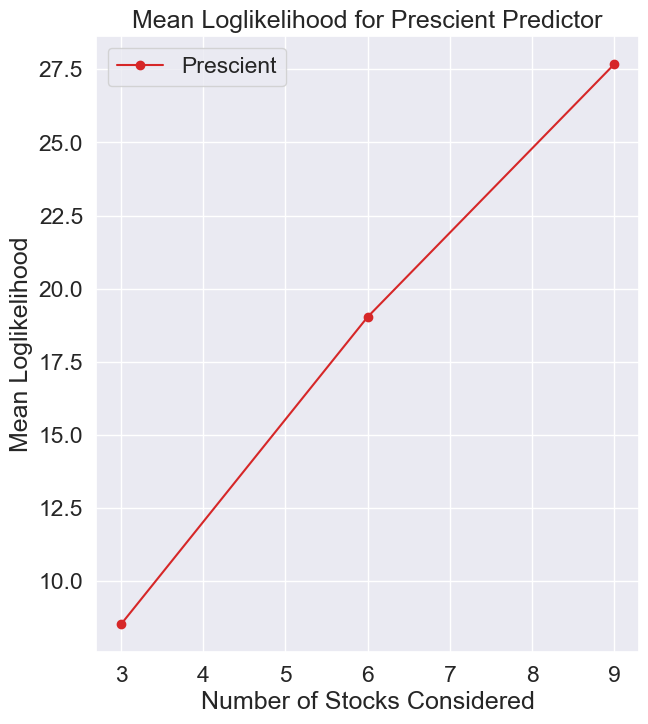

In [ ]:
# now we have to get the mean regret and mean loglikelihood value for the prescient predictor in case of 3, 6 and 9 stocks

filePathName = [
    "detsAndMatrixProduct3Assets.csv",
    "detsAndMatrixProduct6Assets.csv",
    "detsAndMatrixProduct9Assets.csv"
]

# mean regret for prescient predictor

# for every file read just the first column, take every value of the first column and sum them up, then divide the sum by the number of rows in the file
mean_determinants_prescient = []
for file in filePathName:
    data = pd.read_csv(file)
    mean_determinants_prescient.append(data.iloc[:, 0].sum() / data.shape[0])

print("mean determinants values: ", mean_determinants_prescient)

# mean matrix product for prescient predictor
mean_matrix_product_prescient = []
for file in filePathName:
    data = pd.read_csv(file)
    mean_matrix_product_prescient.append(data.iloc[:, 1].sum() / data.shape[0])

print("mean matrix product values: ", mean_matrix_product_prescient)

# mean loglikelihood for prescient predictor

# for every file read just the third column, take every value of the third column and sum them up, then divide the sum by the number of rows in the file
mean_loglikelihood_prescient = []
for file in filePathName:
    data = pd.read_csv(file)
    mean_loglikelihood_prescient.append(data.iloc[:, 2].sum() / data.shape[0])

print("mean loglikelihood values: ", mean_loglikelihood_prescient)

# plot the mean regret and mean loglikelihood for the prescient predictor in the case of 3, 6 and 9 stocks
plt.figure(figsize=(7, 8))
plt.plot(number_of_stocks, mean_determinants_prescient, marker='o', label='Prescient', linestyle='-', color='tab:red')
plt.title('Mean determinants for Prescient Predictor')
plt.xlabel('Number of Stocks Considered')
plt.ylabel('Mean determinats value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 8))
plt.plot(number_of_stocks, mean_loglikelihood_prescient, marker='o', label='Prescient', linestyle='-', color='tab:red')
plt.title('Mean Loglikelihood for Prescient Predictor')
plt.xlabel('Number of Stocks Considered')
plt.ylabel('Mean Loglikelihood')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# now here i want to calculate the improvement or the worsening of the hybrid predictors compared to the base predictors, for the mean regret, mean loglikelihood and mean rmse
# calculate the percentage difference between the hybrid and the base predictors for the mean regret, mean loglikelihood and mean rmse(it can be positive or negative)

# mean regret improvement
mean_regret_improvement = {
    'RW': [],
    'EWMA': [],
    'MGARCH': []
}

for i in range(3):
    for model in ['RW', 'EWMA', 'MGARCH']:
        mean_regret_improvement[model].append((mean_regret[f'H_{model}'][i] - mean_regret[model][i]) / mean_regret[model][i] * 100)

        # truncate to 2 decimal places
        mean_regret_improvement[model][i] = round(mean_regret_improvement[model][i], 2)

# change the key names: RW -> H_RW_IMPROVEMENT, EWMA -> H_EWMA_IMPROVEMENT, MGARCH -> H_MGARCH_IMPROVEMENT
mean_regret_improvement['H_RW_BOOST'] = mean_regret_improvement.pop('RW')
mean_regret_improvement['H_EWMA_BOOST'] = mean_regret_improvement.pop('EWMA')
mean_regret_improvement['H_MGARCH_BOOST'] = mean_regret_improvement.pop('MGARCH')

print("Mean Regret Improvement: ", mean_regret_improvement)

# mean loglikelihood improvement
mean_loglikelihood_improvement = {
    'RW': [],
    'EWMA': [],
    'MGARCH': []
}

for i in range(3):
    for model in ['RW', 'EWMA', 'MGARCH']:
        mean_loglikelihood_improvement[model].append((mean_loglikelihood[f'H_{model}'][i] - mean_loglikelihood[model][i]) / mean_loglikelihood[model][i] * 100)

        # truncate to 2 decimal places
        mean_loglikelihood_improvement[model][i] = round(mean_loglikelihood_improvement[model][i], 2)

# change the key names: RW -> H_RW_IMPROVEMENT, EWMA -> H_EWMA_IMPROVEMENT, MGARCH -> H_MGARCH_IMPROVEMENT
mean_loglikelihood_improvement['H_RW_BOOST'] = mean_loglikelihood_improvement.pop('RW')
mean_loglikelihood_improvement['H_EWMA_BOOST'] = mean_loglikelihood_improvement.pop('EWMA')
mean_loglikelihood_improvement['H_MGARCH_BOOST'] = mean_loglikelihood_improvement.pop('MGARCH')

print("Mean Loglikelihood Improvement: ", mean_loglikelihood_improvement)

# mean rmse improvement
mean_rmse_improvement = {
    'RW': [],
    'EWMA': [],
    'MGARCH': []
}

for i in range(3):
    for model in ['RW', 'EWMA', 'MGARCH']:
        mean_rmse_improvement[model].append((mean_rmse[f'H_{model}'][i] - mean_rmse[model][i]) / mean_rmse[model][i] * 100)

        # truncate to 2 decimal places
        mean_rmse_improvement[model][i] = round(mean_rmse_improvement[model][i], 2)

# change the key names: RW -> H_RW_IMPROVEMENT, EWMA -> H_EWMA_IMPROVEMENT, MGARCH -> H_MGARCH_IMPROVEMENT
mean_rmse_improvement['H_RW_BOOST'] = mean_rmse_improvement.pop('RW')
mean_rmse_improvement['H_EWMA_BOOST'] = mean_rmse_improvement.pop('EWMA')
mean_rmse_improvement['H_MGARCH_BOOST'] = mean_rmse_improvement.pop('MGARCH')

print("Mean RMSE Improvement: ", mean_rmse_improvement)

Mean Regret Improvement:  {'H_RW_BOOST': [-25.0, -33.33, 4.76], 'H_EWMA_BOOST': [33.33, 12.5, 35.0], 'H_MGARCH_BOOST': [50.0, 40.0, 14.29]}
Mean Loglikelihood Improvement:  {'H_RW_BOOST': [1.23, 2.25, -0.78], 'H_EWMA_BOOST': [-1.22, -0.55, -2.73], 'H_MGARCH_BOOST': [-1.2, -0.54, -1.14]}
Mean RMSE Improvement:  {'H_RW_BOOST': [-4.66, -6.54, -9.01], 'H_EWMA_BOOST': [-1.42, -1.08, -1.25], 'H_MGARCH_BOOST': [-9.54, -11.6, -14.0]}


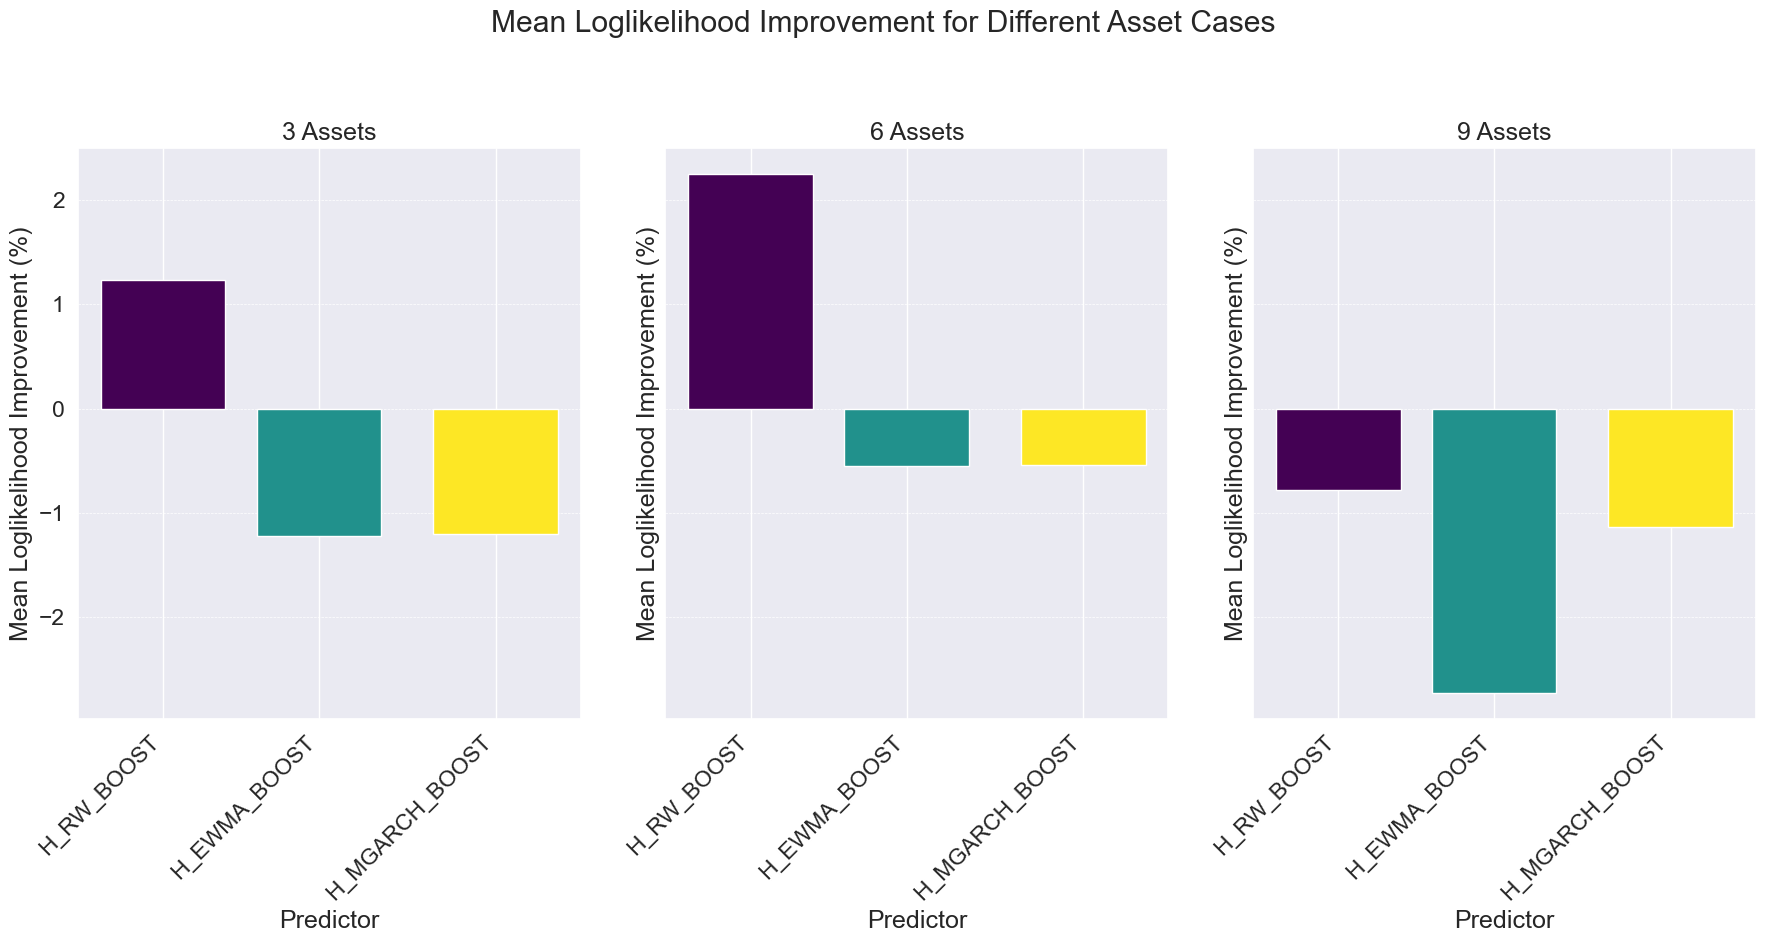

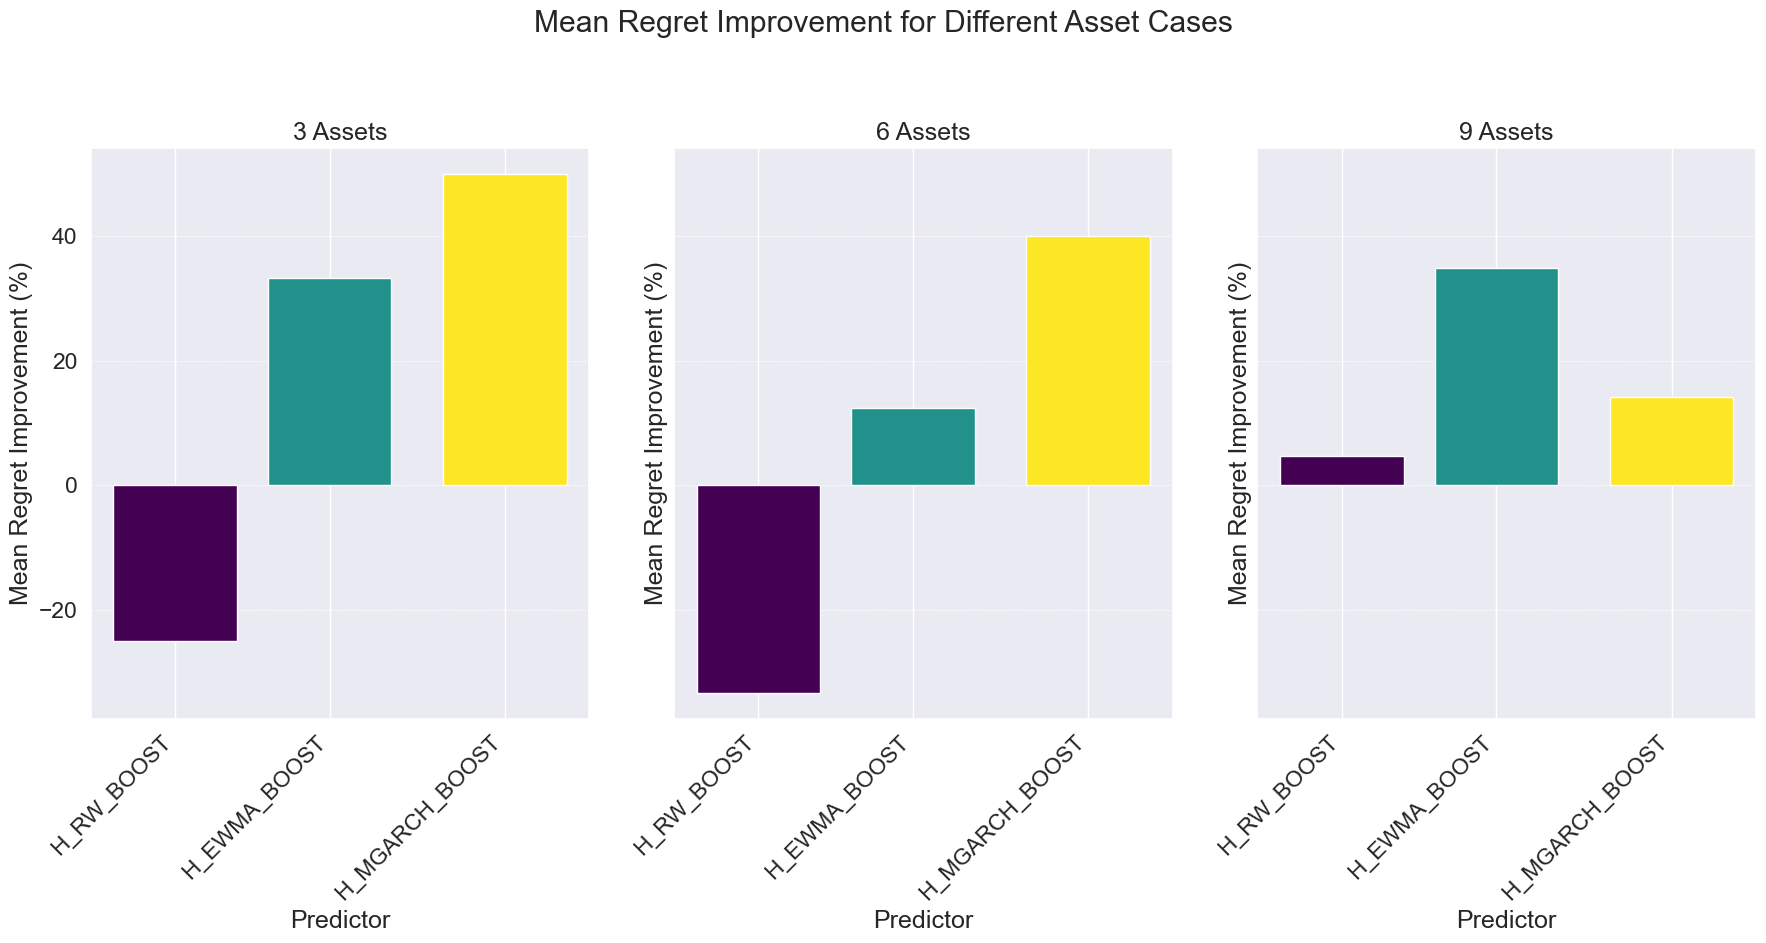

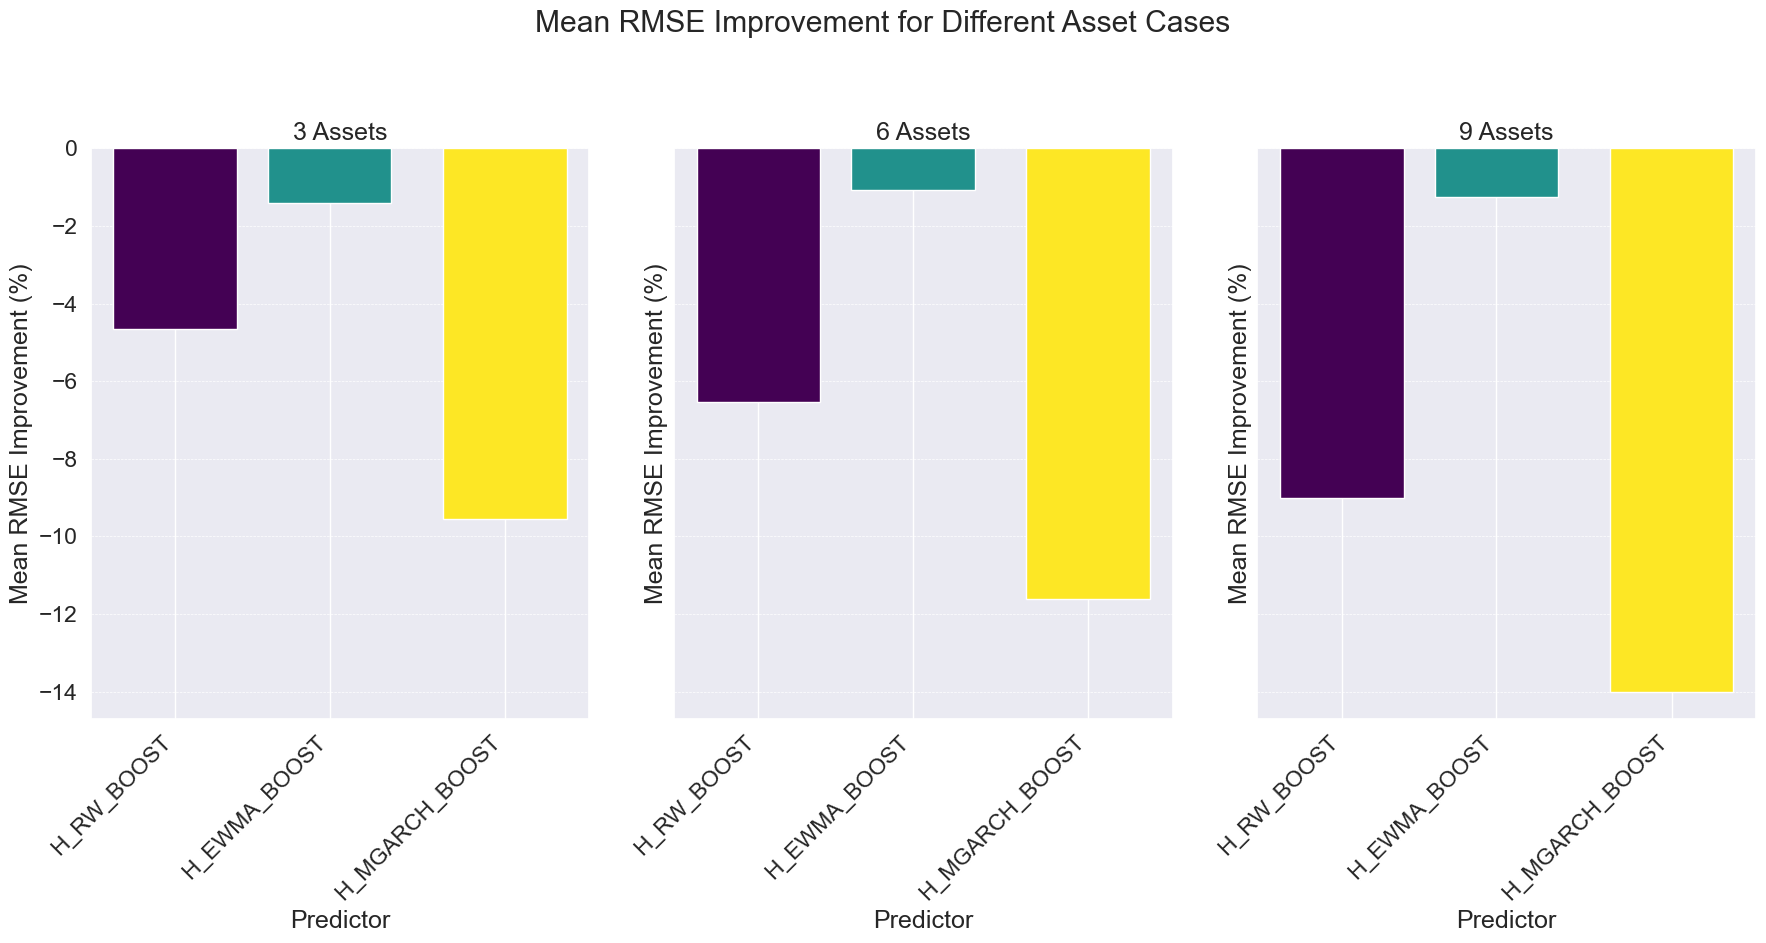

In [ ]:
# now i want to plot a chart for the improvement of the hybrid predictors compared to the base predictors for the mean regret, mean loglikelihood and mean rmse

# Mean Regret Improvement
#plot_metric_with_styles_and_colors(mean_regret_improvement, 'Mean Regret Improvement for Hybrid Predictors', 'Mean Regret Improvement (%)')

# Mean Loglikelihood Improvement
#plot_metric_with_styles_and_colors(mean_loglikelihood_improvement, 'Mean Loglikelihood Improvement for Hybrid Predictors', 'Mean Loglikelihood Improvement (%)')

# Mean RMSE Improvement
#plot_metric_with_styles_and_colors(mean_rmse_improvement, 'Mean RMSE Improvement for Hybrid Predictors', 'Mean RMSE Improvement (%)')

# Creating figure and axes for plotting  mean Loglikelihood improvement
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean Loglikelihood Improvement for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_loglikelihood_improvement, '3 Assets', 'Mean Loglikelihood Improvement (%)', axs[0], 0)
plot_histogram(mean_loglikelihood_improvement, '6 Assets', 'Mean Loglikelihood Improvement (%)', axs[1], 1)
plot_histogram(mean_loglikelihood_improvement, '9 Assets', 'Mean Loglikelihood Improvement (%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting  mean Regret improvement
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean Regret Improvement for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_regret_improvement, '3 Assets', 'Mean Regret Improvement (%)', axs[0], 0)
plot_histogram(mean_regret_improvement, '6 Assets', 'Mean Regret Improvement (%)', axs[1], 1)
plot_histogram(mean_regret_improvement, '9 Assets', 'Mean Regret Improvement (%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Creating figure and axes for plotting  mean RMSE improvement
fig, axs = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Mean RMSE Improvement for Different Asset Cases')

# Plotting for 3, 6, and 9 asset cases
plot_histogram(mean_rmse_improvement, '3 Assets', 'Mean RMSE Improvement (%)', axs[0], 0)
plot_histogram(mean_rmse_improvement, '6 Assets', 'Mean RMSE Improvement (%)', axs[1], 1)
plot_histogram(mean_rmse_improvement, '9 Assets', 'Mean RMSE Improvement (%)', axs[2], 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# FINAL PLOT WITH ALL THE PREDICTOR IN THE SAME CHART(VOLATILITY)

In [ ]:
def plot_prices_volatilities_for_all_predictors(stockPercentageChangeReturn, real_volatility, real_volatility_startDate, real_volatility_endDate, all_predictors_volatilities, asset_name):
    '''
    Function to plot prices and volatilities of all predictors
    '''
    # Convert start and end dates to datetime
    real_volatility_startDate = pd.to_datetime(real_volatility_startDate)
    real_volatility_endDate = pd.to_datetime(real_volatility_endDate)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 11), sharex=True)

    # Convert the asset name from the actual name to the PERMCO code
    asset_codes = {"AAPL": 7, "IBM": 20990, "MCD": 21177}
    asset_code = asset_codes.get(asset_name, asset_name)

    # Plot stock prices
    if asset_code in stockPercentageChangeReturn.columns:
        ax1.plot(stockPercentageChangeReturn.index, stockPercentageChangeReturn[asset_code], label=f'{asset_name} Price', color='green')
    ax1.set_title(f'{asset_name} Stock Prices')
    ax1.set_ylabel('Price (dollars)')
    ax1.legend(loc='upper left')

    # Filter the DataFrame for the desired date range
    filtered_volatility = all_predictors_volatilities.loc[real_volatility_startDate:real_volatility_endDate]

    # Plot each predictor's volatility, including real volatility
    for predictor in filtered_volatility.columns:
        color = 'blue' if predictor == 'PRESCIENT' else None  # Make PRESCIENT blue, others default color
        ax2.plot(filtered_volatility.index, filtered_volatility[predictor], label=f'{predictor} Volatility', linestyle='-', color=color)
    
    ax2.set_title(f'{asset_name} Volatility: Real vs. Predictors')
    ax2.set_xlabel('Time (days)')
    ax2.set_ylabel('Volatility (%)')
    ax2.legend(loc='upper left')

    # Set x-axis limits to match the start and end dates
    ax1.set_xlim(left=real_volatility_startDate, right=real_volatility_endDate)
    ax2.set_xlim(left=real_volatility_startDate, right=real_volatility_endDate)

    # Adding vertical lines for specific events
    for ax in [ax1, ax2]:
        ax.axvline(pd.Timestamp('2020-02-24'), color='gray', linestyle='--', lw=2, label='COVID start')  # COVID start
        ax.axvline(pd.Timestamp('2022-02-24'), color='red', linestyle='--', lw=2, label='Ukraine War start')  # Ukraine War start

    plt.tight_layout()
    plt.show() 



def plot_prices_volatilities_with_shaded_area(stockPercentageChangeReturn, real_volatility, real_volatility_startDate, real_volatility_endDate, all_predictors_volatilities, asset_name, predictor_name):
    '''
    Function to plot prices and volatilities of all predictors with a shaded area,
    always including the PRESCIENT volatility for comparison.
    '''
     # Convert start and end dates to datetime
    real_volatility_startDate = pd.to_datetime(real_volatility_startDate)
    real_volatility_endDate = pd.to_datetime(real_volatility_endDate)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 11), sharex=True)

    # Convert the asset name from the actual name to the PERMCO code
    asset_codes = {"AAPL": 7, "IBM": 20990, "MCD": 21177}
    asset_code = asset_codes.get(asset_name, asset_name)

    # Plot stock prices
    if asset_code in stockPercentageChangeReturn.columns:
        ax1.plot(stockPercentageChangeReturn.index, stockPercentageChangeReturn[asset_code], label=f'{asset_name} Price', color='orange')
    ax1.set_title(f'{asset_name} Stock Prices')
    ax1.set_ylabel('Price (dollars)')
    ax1.legend(loc='upper left')

    # Filter the DataFrame for the desired date range
    filtered_volatility = all_predictors_volatilities.loc[real_volatility_startDate:real_volatility_endDate]

    # Calculate the min and max across all predictors for the shaded area
    min_volatility = filtered_volatility.min(axis=1)
    max_volatility = filtered_volatility.max(axis=1)

    # Shaded area between min and max
    ax2.fill_between(filtered_volatility.index, min_volatility, max_volatility, color='gray', alpha=0.2)

    # Plot the PRESCIENT volatility
    ax2.plot(filtered_volatility.index, filtered_volatility['PRESCIENT'], label='PRESCIENT Volatility', color='blue', linestyle='-')

    # Plot the selected predictor's volatility
    ax2.plot(filtered_volatility.index, filtered_volatility[predictor_name], label=f'{predictor_name} Volatility', linestyle='-', color='red')

    # Plot the hybrid version of the selected predictor, if it exists
    hybrid_name = f'H_{predictor_name}'
    if hybrid_name in filtered_volatility.columns:
        ax2.plot(filtered_volatility.index, filtered_volatility[hybrid_name], label=f'{hybrid_name} Volatility', linestyle='-', color='green')
    
    ax2.set_title(f'{asset_name} Volatility: Comparing {predictor_name}, its Hybrid, and PRESCIENT')
    ax2.set_xlabel('Time (days)')
    ax2.set_ylabel('Volatility (%)')
    ax2.legend(loc='upper left')

    # Set x-axis limits to match the start and end dates
    ax1.set_xlim(left=real_volatility_startDate, right=real_volatility_endDate)
    ax2.set_xlim(left=real_volatility_startDate, right=real_volatility_endDate)

    # Adding vertical lines for specific events
    for ax in [ax1, ax2]:
        ax.axvline(pd.Timestamp('2020-02-24'), color='gray', linestyle='--', lw=2, label='COVID start')  # COVID start
        ax.axvline(pd.Timestamp('2022-02-24'), color='purple', linestyle='--', lw=2, label='Ukraine War start')  # Ukraine War start

    plt.tight_layout()
    plt.show()

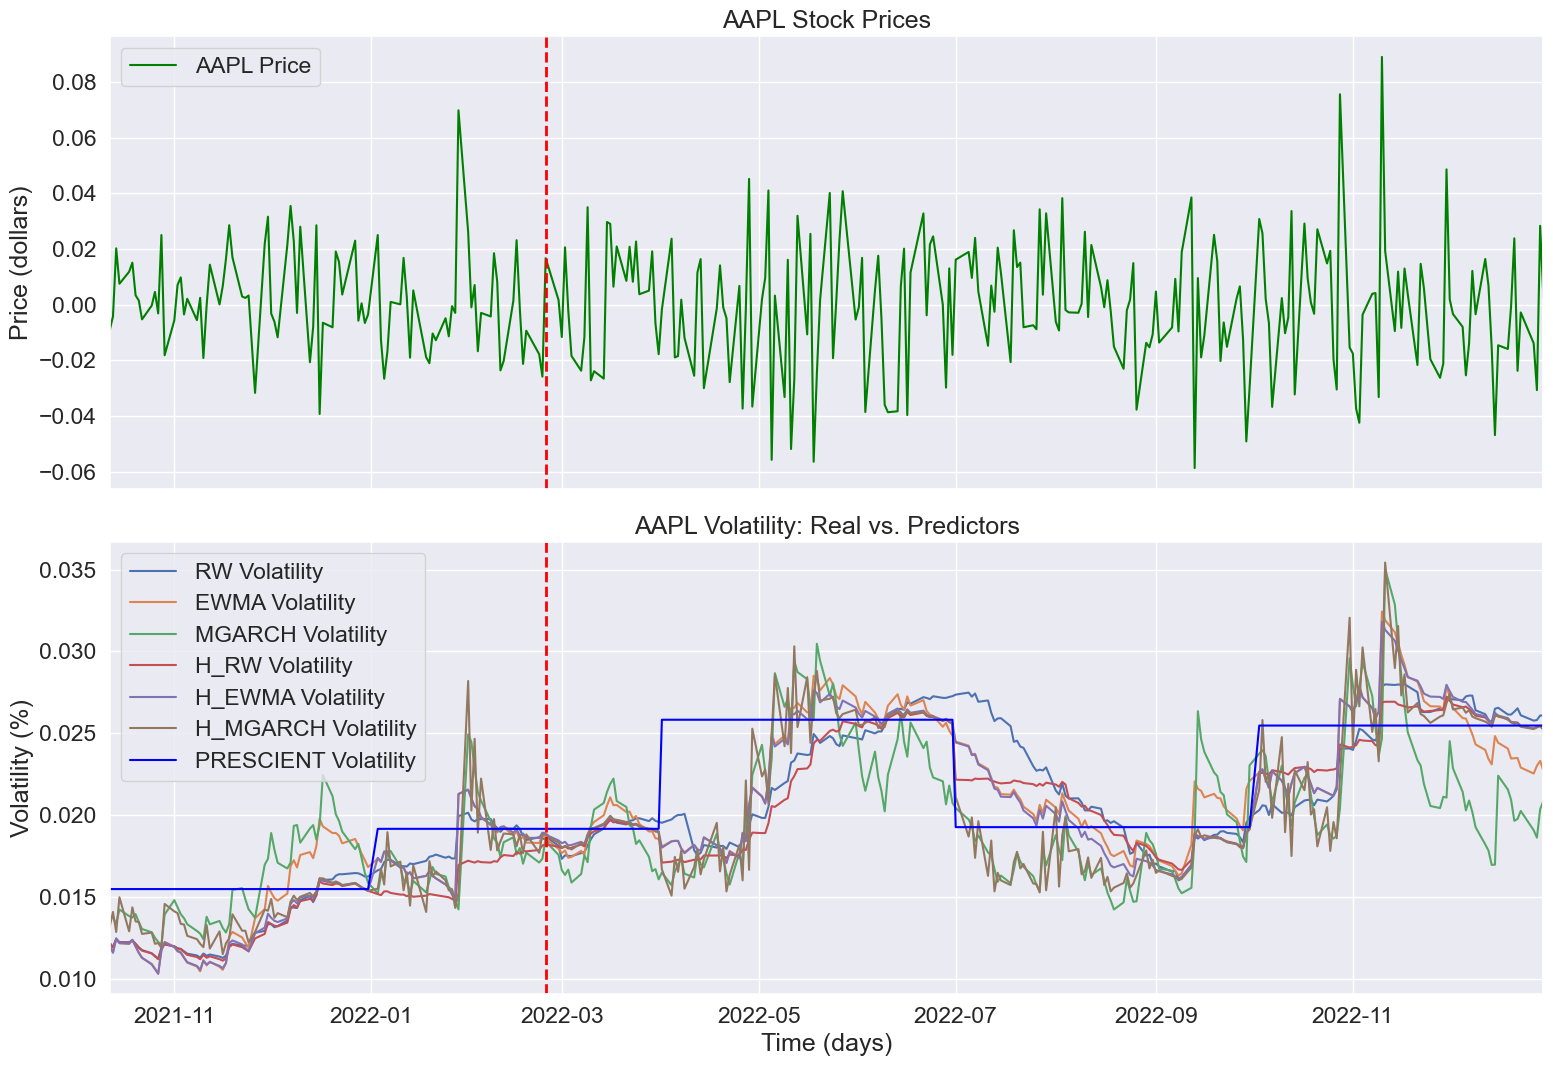

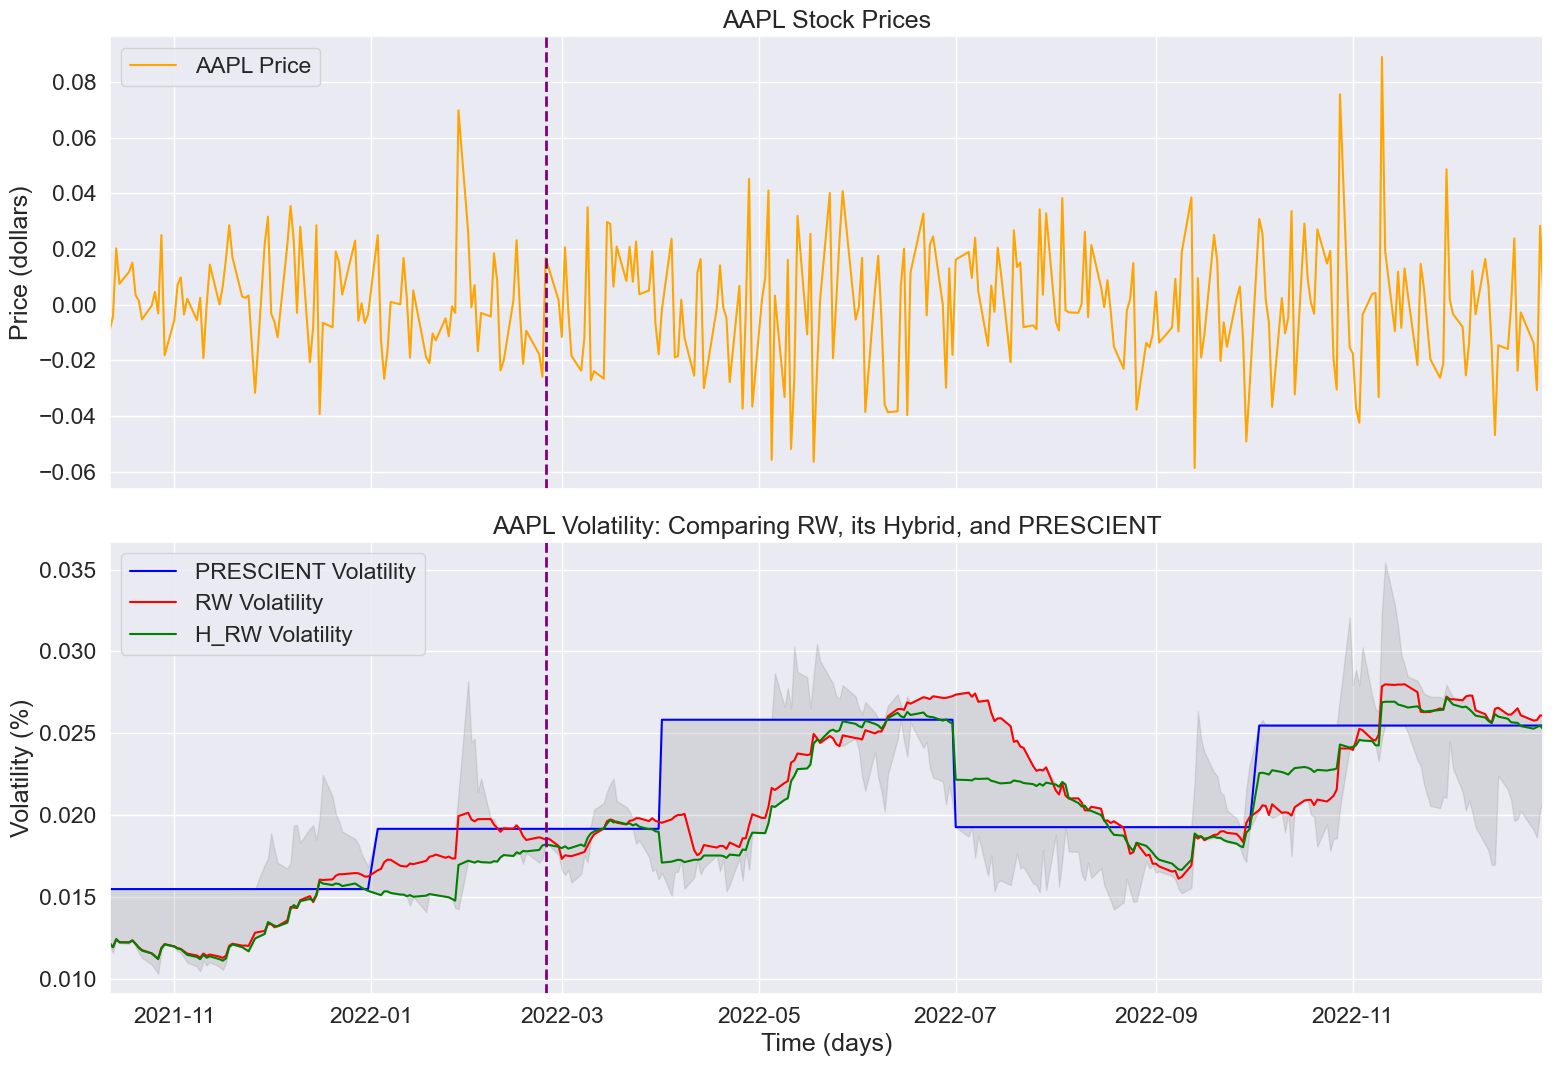

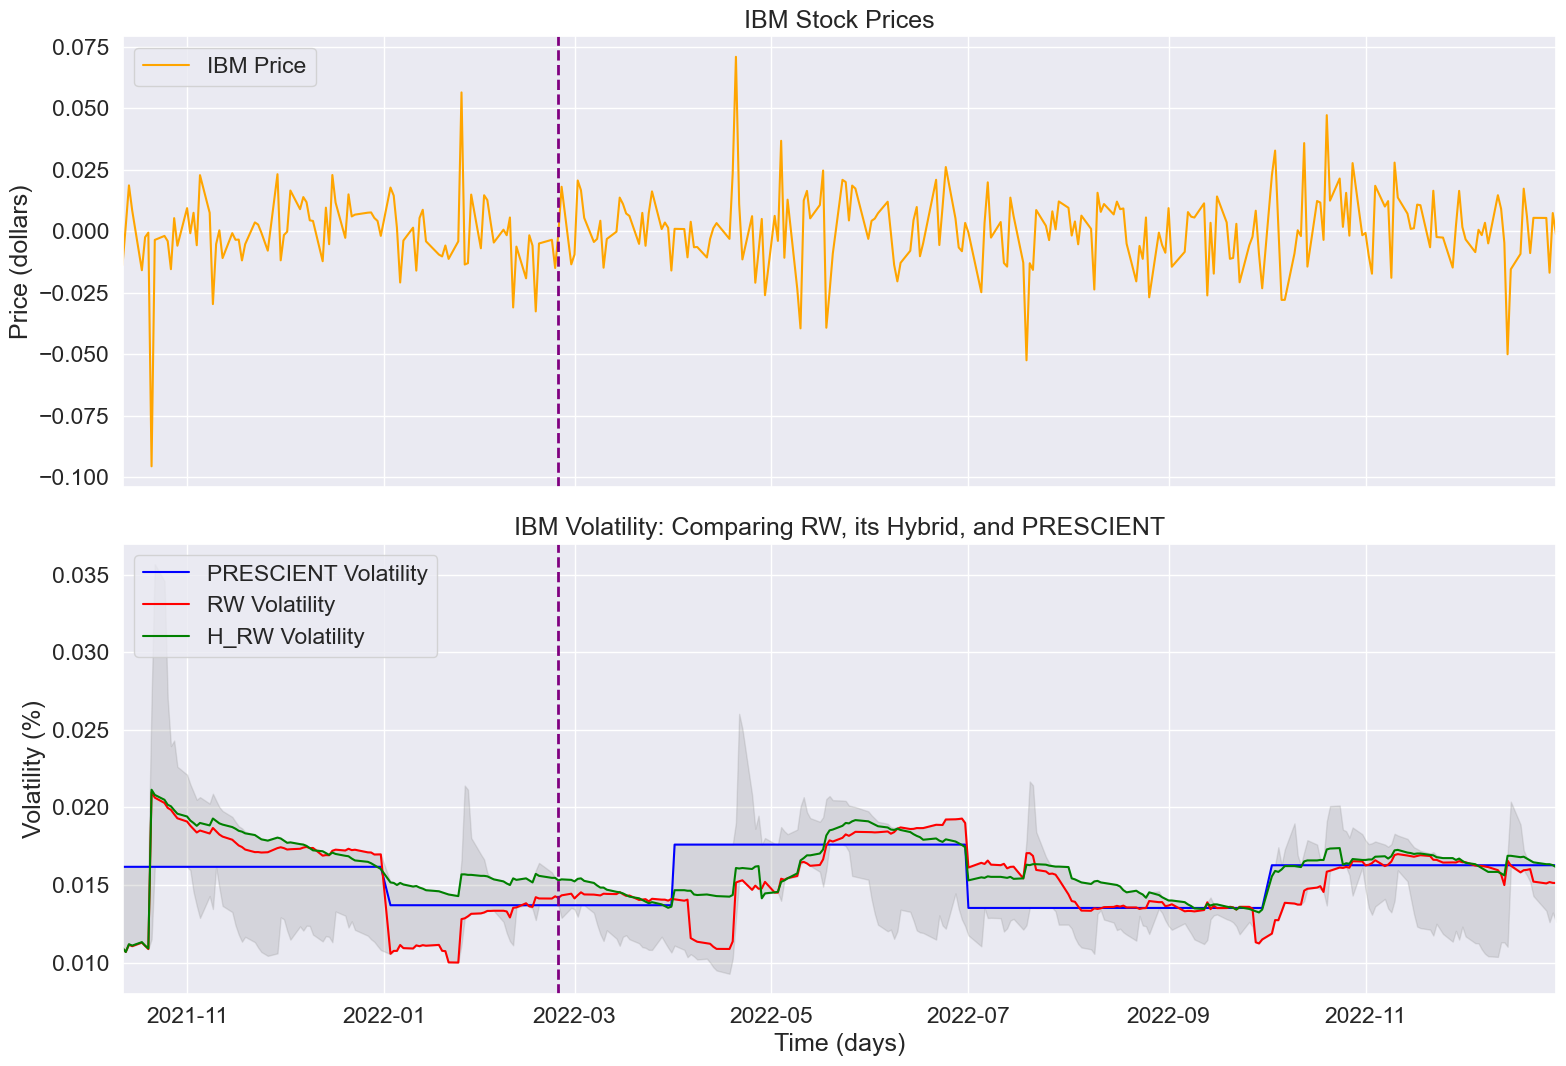

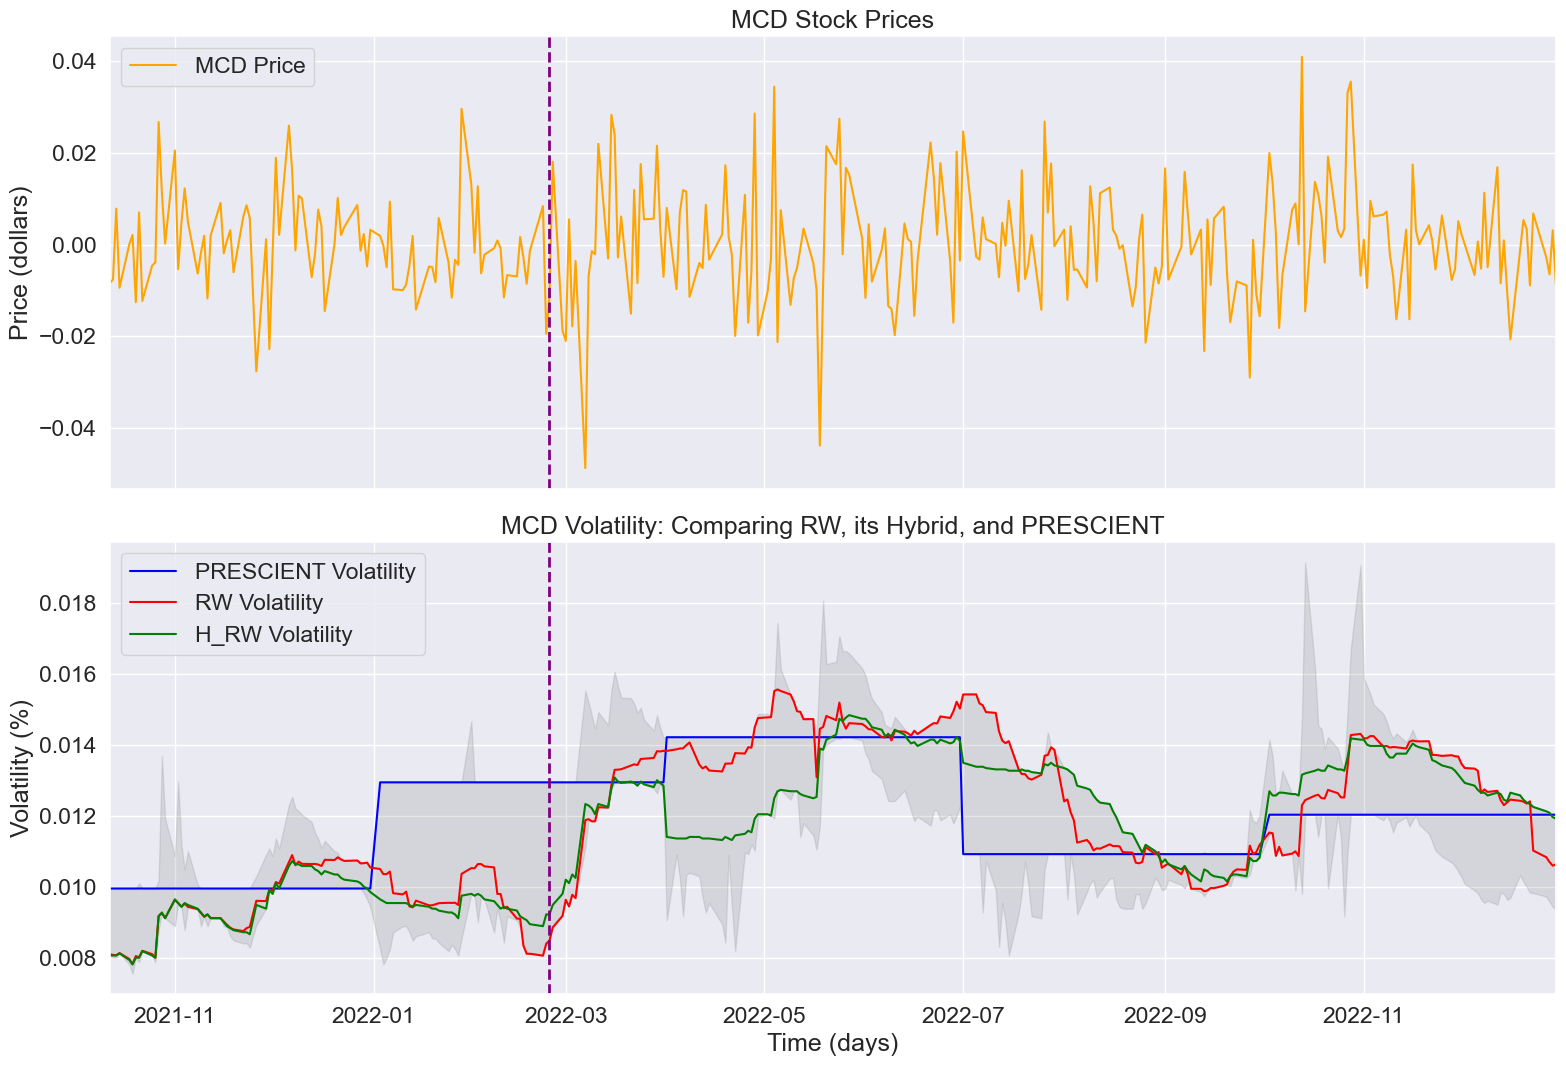

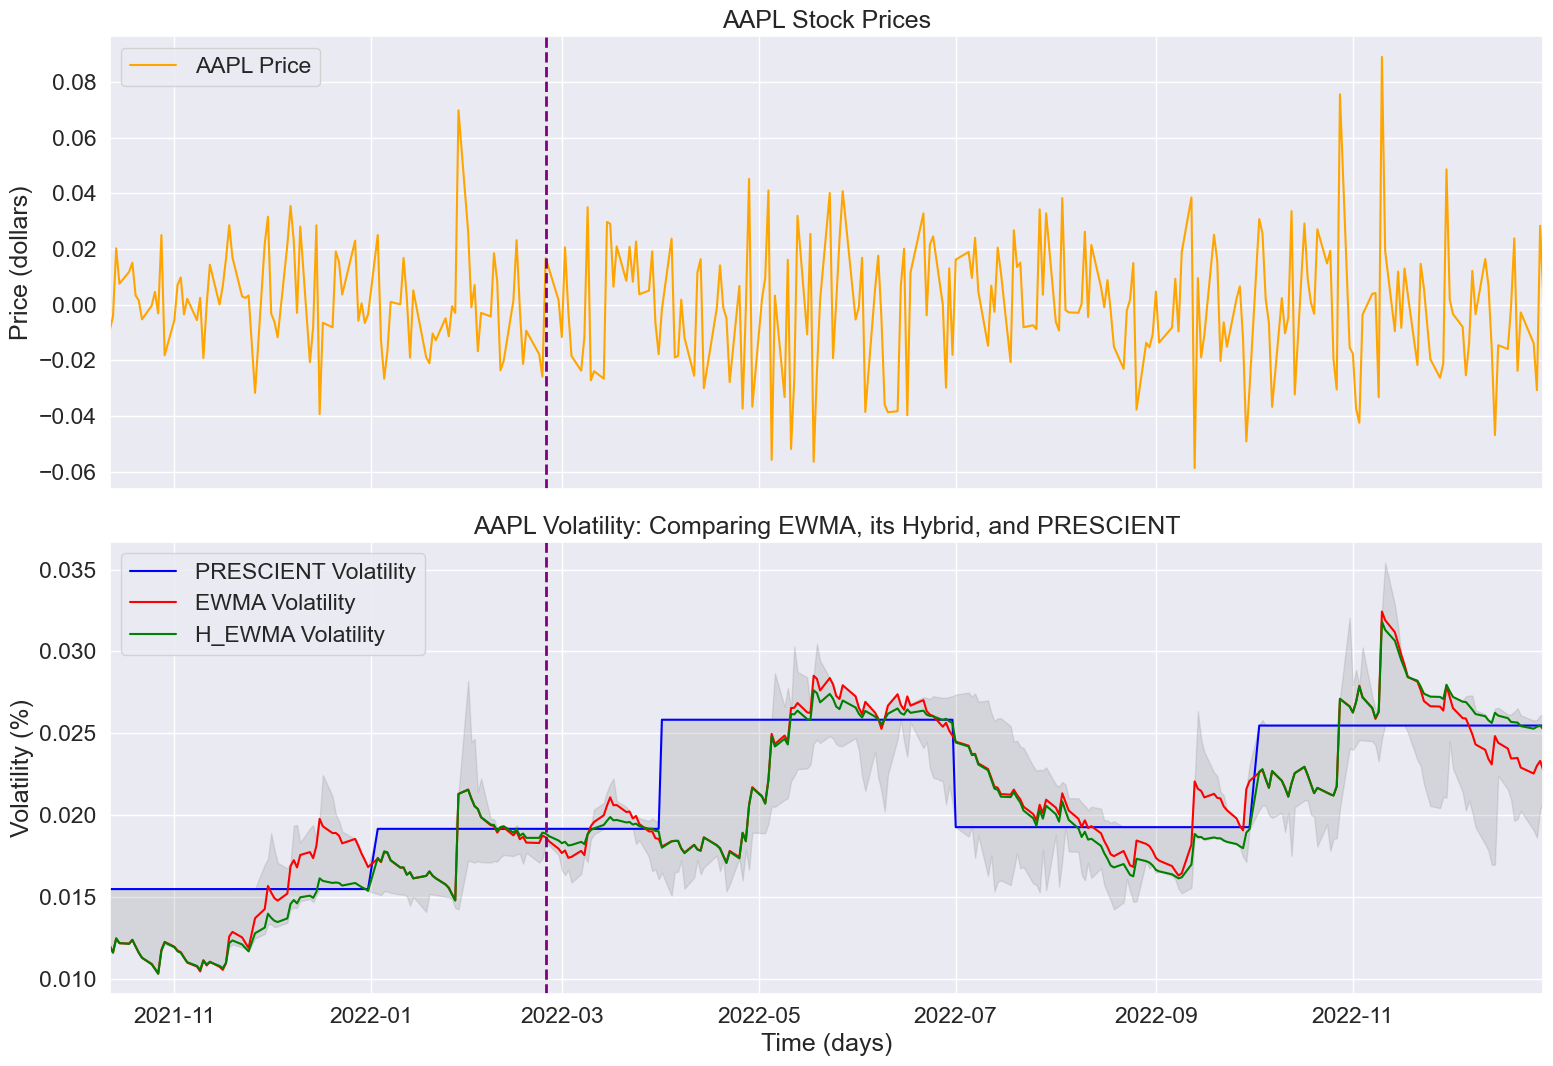

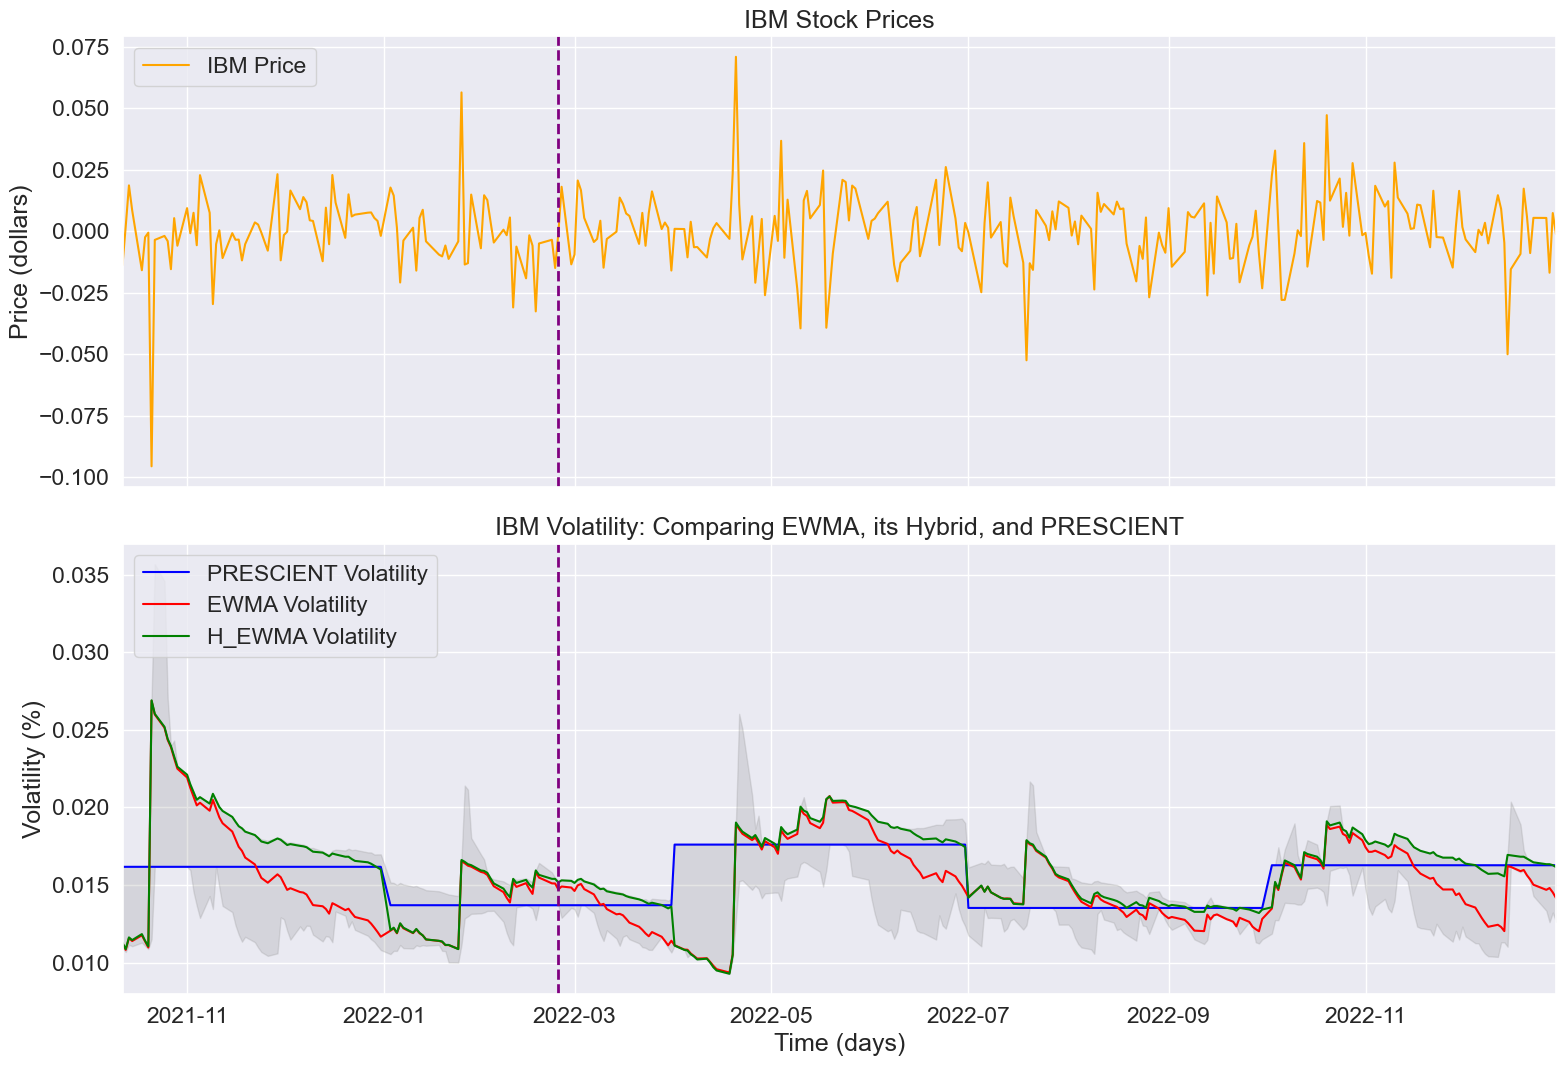

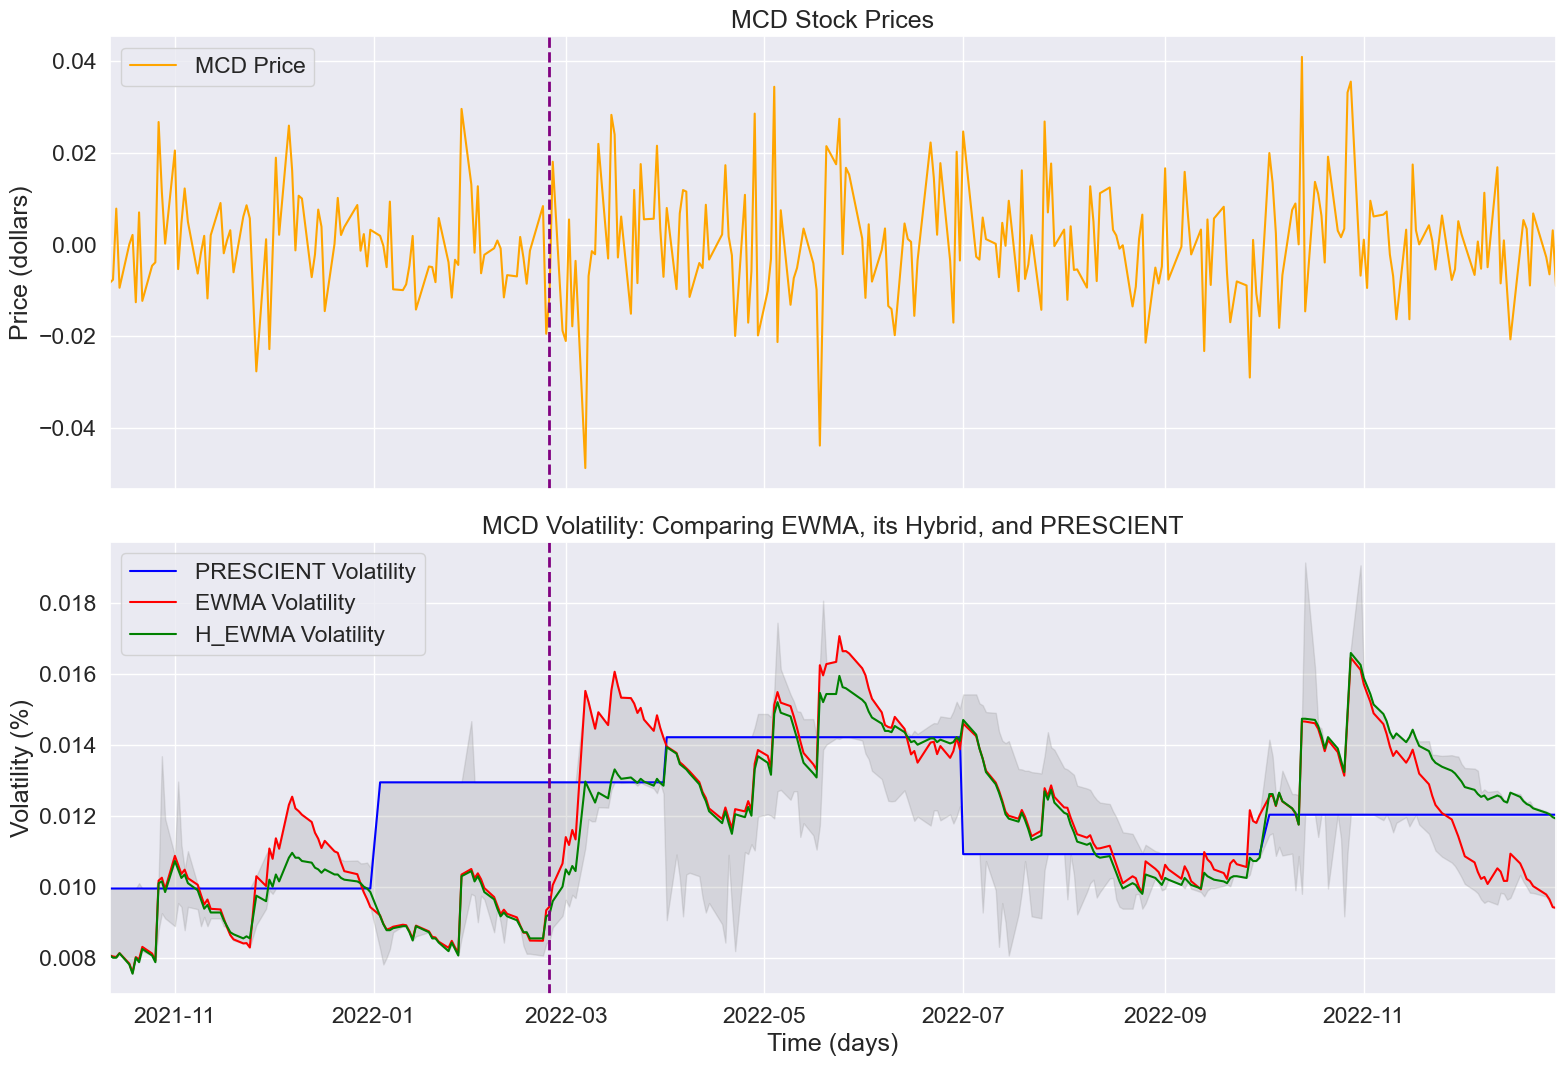

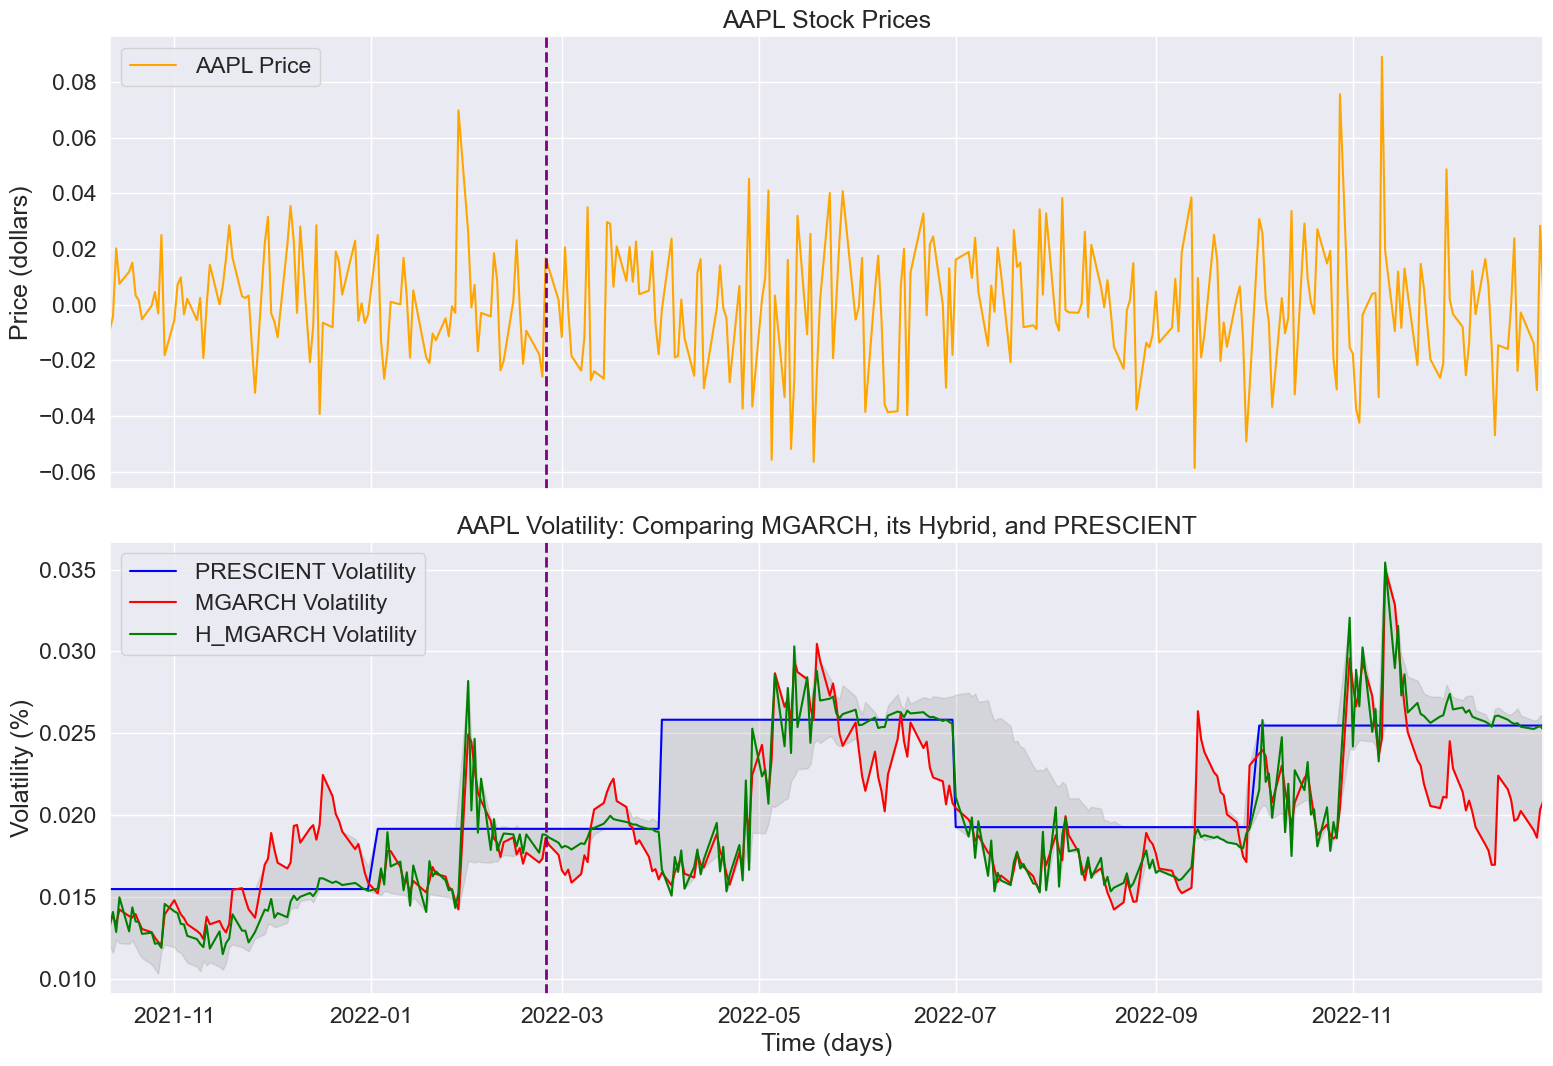

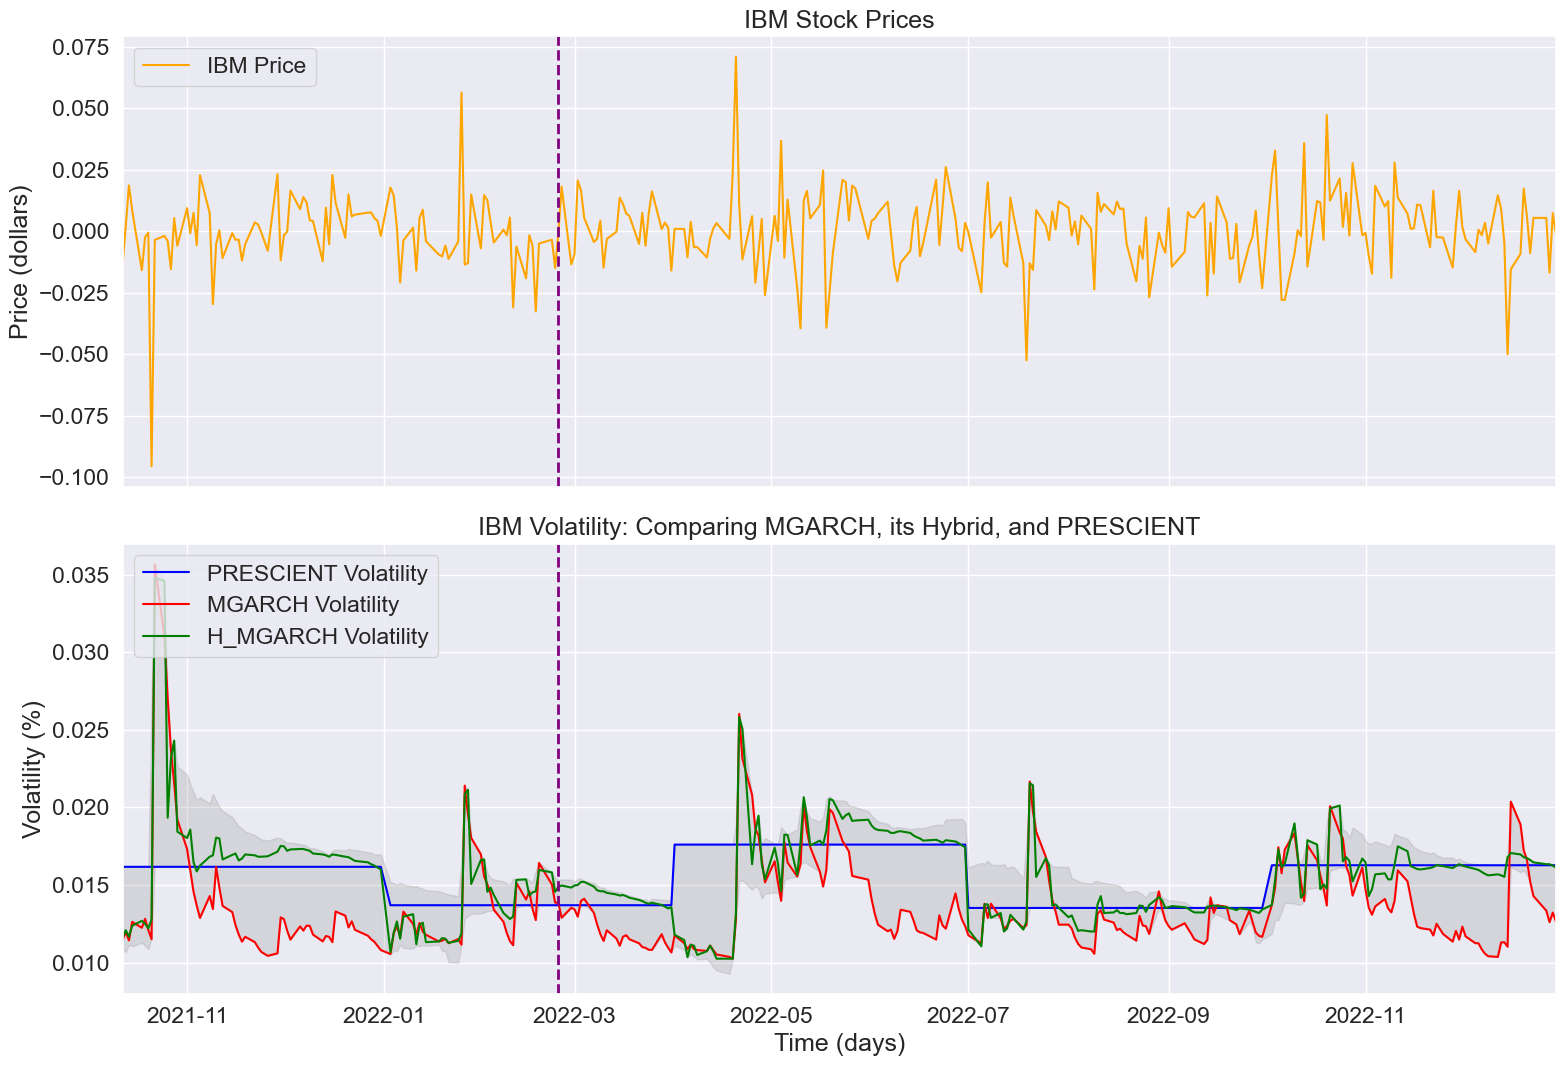

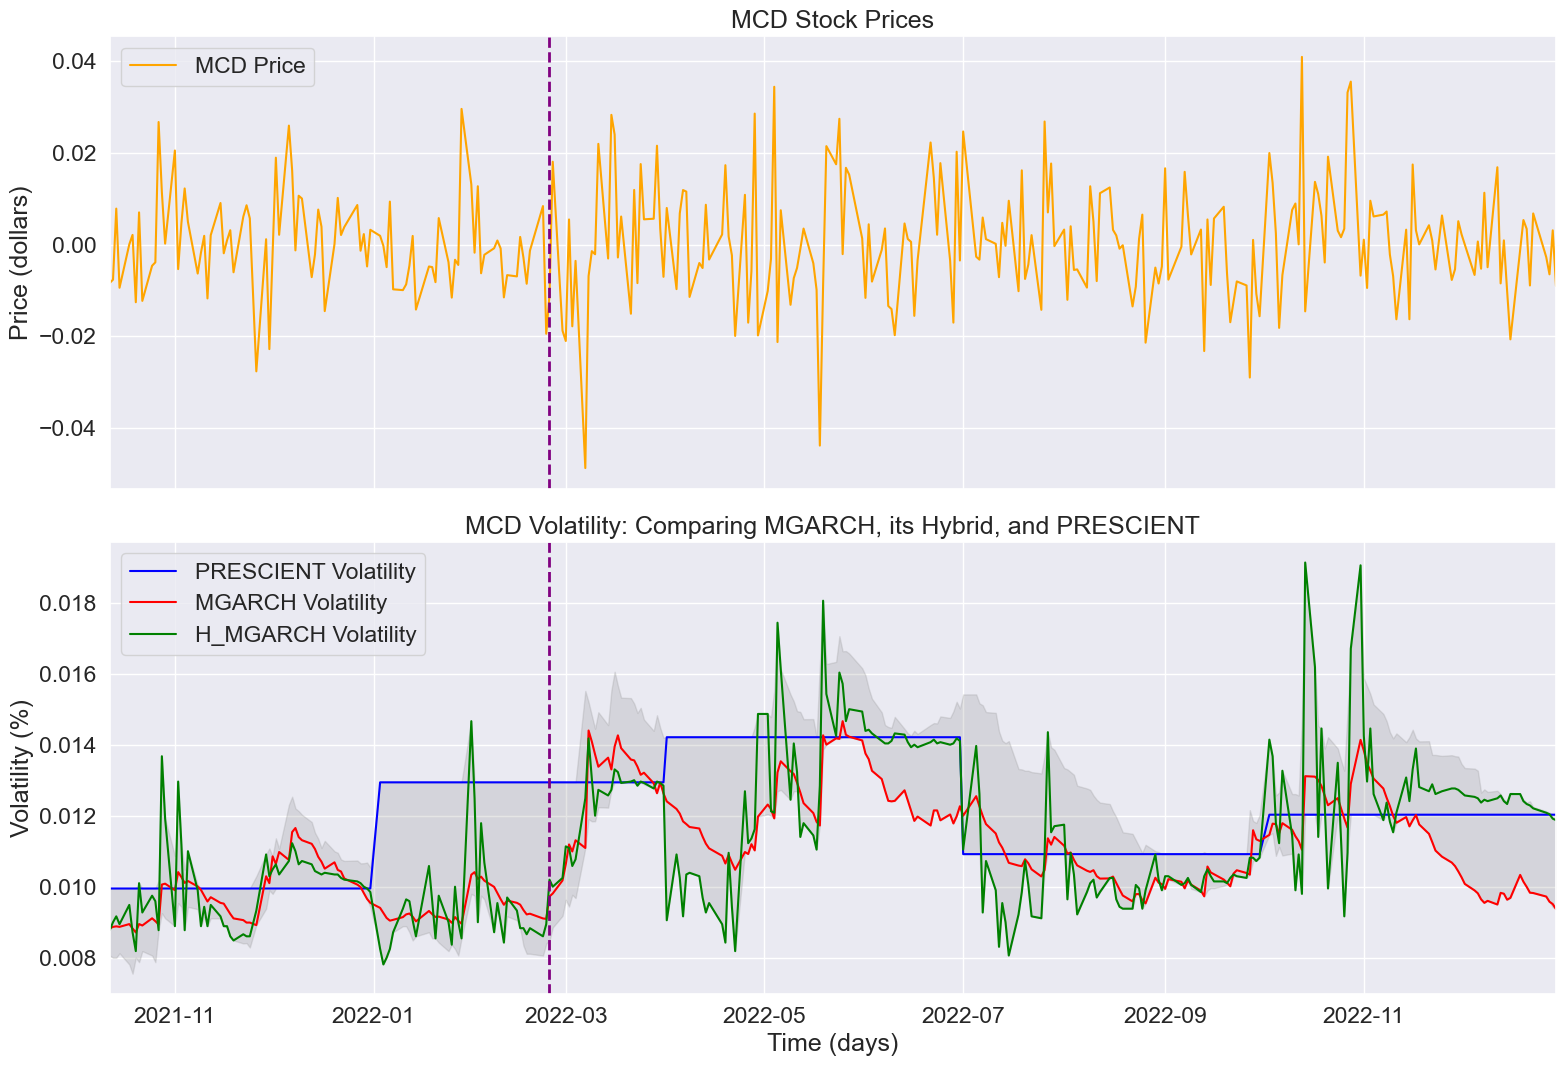

In [ ]:
# here i save every volatility of the predfictors in a dictionary
predictorsVolatilityAAPL = {
    'RW': rw_volatilities["AAPL"],
    'EWMA': ewma_volatilities["AAPL"],
    'MGARCH': mgarch_volatilities["AAPL"],
    'H_RW': hybrid_rw_volatilities["AAPL"],
    'H_EWMA': hybrid_ewma_volatilities["AAPL"],
    'H_MGARCH': hybrid_mgarch_volatilities["AAPL"],
    'PRESCIENT': real_volatilities["AAPL"]
}

predictorsVolatilityIBM = {
    'RW': rw_volatilities["IBM"],
    'EWMA': ewma_volatilities["IBM"],
    'MGARCH': mgarch_volatilities["IBM"],
    'H_RW': hybrid_rw_volatilities["IBM"],
    'H_EWMA': hybrid_ewma_volatilities["IBM"],
    'H_MGARCH': hybrid_mgarch_volatilities["IBM"],
    'PRESCIENT': real_volatilities["IBM"]
}

predictorsVolatilityMCD = {
    'RW': rw_volatilities["MCD"],
    'EWMA': ewma_volatilities["MCD"],
    'MGARCH': mgarch_volatilities["MCD"],
    'H_RW': hybrid_rw_volatilities["MCD"],
    'H_EWMA': hybrid_ewma_volatilities["MCD"],
    'H_MGARCH': hybrid_mgarch_volatilities["MCD"],
    'PRESCIENT': real_volatilities["MCD"]
}

# convert every dictionary to a dataframe
df_predictorsVolatilityAAPL = pd.DataFrame(predictorsVolatilityAAPL)
df_predictorsVolatilityIBM = pd.DataFrame(predictorsVolatilityIBM)
df_predictorsVolatilityMCD = pd.DataFrame(predictorsVolatilityMCD)

# plot the prices and volatilities for all the predictors
plot_prices_volatilities_for_all_predictors(testDataWithPercentageChange, df_predictorsVolatilityAAPL["PRESCIENT"], start_date, end_date, df_predictorsVolatilityAAPL, 'AAPL')
# plot the prices and volatilities for all the predictors
#plot_prices_volatilities_for_all_predictors(testDataWithPercentageChange, df_predictorsVolatilityIBM["PRESCIENT"], start_date, end_date, df_predictorsVolatilityIBM, 'IBM')
# plot the prices and volatilities for all the predictors
#plot_prices_volatilities_for_all_predictors(testDataWithPercentageChange, df_predictorsVolatilityMCD["PRESCIENT"], start_date, end_date, df_predictorsVolatilityMCD, 'MCD')

predictorList = ['RW', 'EWMA', 'MGARCH']

for predictor in predictorList:
    # RW AND H_RW CHARTS
    plot_prices_volatilities_with_shaded_area(testDataWithPercentageChange, df_predictorsVolatilityAAPL["PRESCIENT"], start_date, end_date, df_predictorsVolatilityAAPL, 'AAPL', predictor)
    plot_prices_volatilities_with_shaded_area(testDataWithPercentageChange, df_predictorsVolatilityIBM["PRESCIENT"], start_date, end_date, df_predictorsVolatilityIBM, 'IBM', predictor)
    plot_prices_volatilities_with_shaded_area(testDataWithPercentageChange, df_predictorsVolatilityMCD["PRESCIENT"], start_date, end_date, df_predictorsVolatilityMCD, 'MCD', predictor)

# MPC OPTIMIZATION PROBLEM

In [ ]:
# here i recover every covariance matrix of the filtered test dataset(the test dataset without the first 19 days)
# the covariance matrix recovered are the one of the MGARCH, H_MGARCH, prescient

%store -r rwDictFiltered
%store -r ewmaDictFiltered
%store -r mgarchDictFiltered
%store -r hybridRwDictFiltered
%store -r hybridEwmaDictFiltered
%store -r hybridMgarchDictFiltered
%store -r prescientDictFiltered

In [ ]:
# OBJECTIVE FUNCTIONS

def minVolatilityMaxReturn(weights, covarianceMatrix, excess_returns, gamma):
    '''
    this function is used to implement the objective function for the minimum volatility and max return optimization problem
    ''' 
    # Portfolio risk
    risk = cp.quad_form(weights, covarianceMatrix)

    # Portfolio return
    ret = excess_returns.T @ weights

    # Objective function: Minimize risk
    objectiveFunction = cp.Minimize(gamma * risk - ret)

    return objectiveFunction


def minVolatility(weights, covarianceMatrix):
    '''
    this function is used to implement the objective function for the minimum volatility optimization problem
    ''' 
    # Portfolio risk
    risk = cp.quad_form(weights, covarianceMatrix)

    # Objective function: Minimize risk
    objectiveFunction = cp.Minimize(0.5 * risk)

    return objectiveFunction


def maxReturn(weights, excess_returns):
    '''
    this function is used to implement the objective function for the max return optimization problem
    ''' 
    # Portfolio return
    ret = (excess_returns.T @ weights) 

    # Objective function: Maximize return
    objectiveFunction = cp.Maximize(ret)

    return objectiveFunction


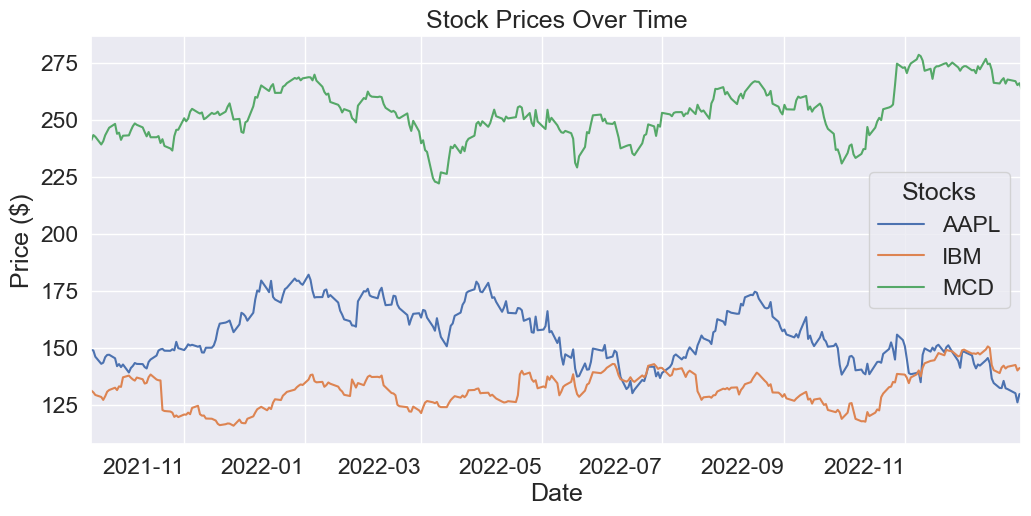

In [ ]:
def plot_stock_prices(testDataWithPrices, asset_names):
    # Check if the DataFrame has the necessary columns
    if not all(asset in testDataWithPrices.columns for asset in asset_names):
        print("testDataWithPrices must contain price columns for specified assets.")
        return
    
    # Set the index of the DataFrame to 'Date' if not already set
    if testDataWithPrices.index.name != 'Date' and 'Date' in testDataWithPrices.columns:
        testDataWithPrices.set_index('Date', inplace=True)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    for asset in asset_names:
        plt.plot(testDataWithPrices.index, testDataWithPrices[asset], label=asset)

    plt.title('Stock Prices Over Time')
    plt.xlabel('Date')
    plt.xlim(testDataWithPrices.index[0], testDataWithPrices.index[-1])
    plt.ylabel('Price ($)')
    plt.legend(title='Stocks')
    plt.grid(True)

    # Set x-axis to display dates similar to the weights distribution chart
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gcf().autofmt_xdate()  # Automatically formats the x-axis data to fit the plot with horizontal rotation

    # remove the rotation of the x-axis labels
    plt.xticks(rotation=0)

    plt.show()


def plot_cumulative_compounded_returns(results_dict):
    plt.figure(figsize=(12, 8))
    
    # Iterating over the dictionary of result DataFrames
    for key, df in results_dict.items():
        # Ensure the DataFrame has a DateTimeIndex
        if not isinstance(df.index, pd.DatetimeIndex):
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)

        if 'Portfolio Returns' not in df.columns:
            continue
        
        # Calculate cumulative compounded returns
        # Start by shifting the returns by 1 day to handle the initial condition (starting with no investment gain)
        df['Compounded Returns'] = (1 + df['Portfolio Returns']).cumprod() - 1
        
        # Calculate the total compounded return at the end of the period
        total_compounded_return = df['Compounded Returns'].iloc[-1]
        
        # Plotting each predictor's cumulative compounded returns
        plt.plot(df.index, df['Compounded Returns'], label=f'{key} Predictor (Total: {total_compounded_return * 100:.2f}%)')
        
        # Mark the end of each quarter
        for date in df.index:
            if date.quarter != (date + pd.DateOffset(days=1)).quarter:
                plt.axvline(date, color='gray', linestyle='--', lw=1)

    plt.title('Cumulative Compounded Returns Over Time by Predictor')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Compounded Returns(%)')
    plt.legend()
    plt.grid(True)
    plt.xlim(df.index[0], df.index[-1])
    plt.show()


def plot_daily_metric(predictors_dict, metric_name):
    plt.figure(figsize=(14, 7))  # Set the figure size for better readability

    # Loop through each predictor and plot their risks
    for label, df in predictors_dict.items():
        if not isinstance(df.index, pd.DatetimeIndex):
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)

        # Plotting daily risks for each predictor
        plt.plot(df[f'Portfolio {metric_name}'], label=f'{label} Daily {metric_name}')


    plt.title(f'Comparison of Daily {metric_name} Across Predictors')
    plt.xlabel('Date')
    plt.ylabel(f'Total Daily {metric_name}(%)')
    plt.legend()
    plt.grid(True)
    plt.xlim(df.index[0], df.index[-1])
    plt.show()


def calculate_quarterly_performance(results_df):
    '''
    Function to calculate quarterly returns and more accurately calculated risks.
    '''
    # Group by quarter
    quarterly_data = results_df.resample('Q')

    # Calculate compounded returns for each quarter
    # Use apply to calculate the compounded return for each quarter
    if 'Portfolio Returns' in results_df.columns:
        quarterly_returns = quarterly_data['Portfolio Returns'].apply(lambda x: (1 + x).prod() - 1)

        # get the number of days in each quarter
        numberOfDaysInQuarters = quarterly_data.size()

        # for every quarter sum the daily risks and then divide the sum by the number of trading days in that specific quarter
        daily_risks = quarterly_data['Portfolio Risks'].sum()
        averageDailyRisk = daily_risks / numberOfDaysInQuarters

        # Calculate the quarterly risk as the average daily risk times the square root of the number of trading days in that specific quarter. Do this for every quarter
        quarterly_risks = averageDailyRisk * np.sqrt(numberOfDaysInQuarters)

        return pd.DataFrame({
            'Quarterly Returns': quarterly_returns * 100,
            'Quarterly Risks': quarterly_risks * 100
        })
    
    else:
        # this is the case of the objective function results
        # to calculate the quarterly performance sum up al the value inside the quarter and then divide by the number of trading days in that quarter
        quartelyCumulativeSum = quarterly_data['Objective Function Values'].sum()

        return pd.DataFrame({
            'Quarterly Objective Function Values': quartelyCumulativeSum * 100
        })


def plot_quarterly_metrics(quarterly_results_dict, metric_type):
    metrics = ['mean']#, 'min', 'max']  # Metrics to be calculated and plotted
    metric_titles = {
        'mean': 'Average',
        'min': 'Minimum',
        'max': 'Maximum'
    }

    # Define color map for predictor types
    colors = {
        'Prescient': 'red',  # Red color for prescient
    }

    # Default colors for others
    default_color = 'orange'  # Normal predictors
    hybrid_color = 'green'  # Hybrid predictors

    for metric in metrics:
        plt.figure(figsize=(12, 6))

        for key, df in quarterly_results_dict.items():
            # if the predictor is prescient skip the iteration
            if key == 'Prescient':
                continue
            # Calculate the specified metric for the current DataFrame
            if metric == 'mean':
                value = df[metric_type].mean()

            # Select color based on predictor type
            if 'H_' in key:
                color = hybrid_color  # Green for hybrids
            elif 'Prescient' in key:
                color = colors['Prescient']  # Red for Prescient
            else:
                color = default_color  # Blue for normal predictors

            # before plotting normalize the result respect to the prescient value(do this: value of predictor - value of prescient )
            value = value - quarterly_results_dict['Prescient'][metric_type].mean()

            # Plotting each predictor's performance
            bar = plt.bar(key, value, color=color, label=f'{key} ({value:.2f}%)')

            # Adding value labels on each bar
            height = bar[0].get_height()
            plt.text(bar[0].get_x() + bar[0].get_width() / 2.0, height, f'{value:.2f}', ha='center', va='bottom')

        plt.title(f'{metric_titles[metric]} {metric_type.capitalize()} Across Predictors')
        plt.ylabel(f'{metric_type.capitalize()} (-)')
        plt.xticks(rotation=45)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()



def plot_metric_across_predictors(results_dict, metric, metric_name):
    # Specify the exact order of predictors including hybrid versions and Prescient
    sorted_keys = ['RW', 'H_RW', 'EWMA', 'H_EWMA', 'MGARCH', 'H_MGARCH', 'Prescient']
    
    values = []
    labels = []
    
    for key in sorted_keys:
        df = results_dict.get(key)  # Use get to handle cases where a key might not exist
        if df is not None:
            if not isinstance(df.index, pd.DatetimeIndex):
                df['Date'] = pd.to_datetime(df['Date'])
                df.set_index('Date', inplace=True)
            
            # Compute the desired metric
            if metric == 'mean' and metric_name in df.columns:
                metric_value = df[f'{metric_name}'].mean()
            else:
                return  # Invalid metric

            values.append(metric_value)
            labels.append(key)

    # Plotting
    plt.figure(figsize=(12, 6))
    # Color configuration: Prescient in red, hybrids in green, others in blue
    colors = ['green' if 'H_' in label else 'blue' for label in labels]
    colors[-1] = 'red' if labels[-1] == 'Prescient' else colors[-1]  # Ensure Prescient is always red

    # Adjust the width here to control space between bars
    bar_width = 0.7  # Smaller values create more space between bars
    bars = plt.bar(labels, values, color=colors, width=bar_width)
    plt.title(f'{metric_name} {metric.capitalize()} Across Predictors')
    plt.ylabel(f'{metric_name} (-)')
    plt.xlabel('Predictors')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Adding value labels on top of each bar
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, value, f"{value*100:.3f}", 
                 ha='center', va='bottom', color='black')

    plt.show()


def plot_daily_weights_and_metrics(df, predictorName, predictors_dict, metric_name):
    # Check if the DataFrame has the necessary columns
    if 'Optimal Weights' not in df.columns:
        print("DataFrame must contain an 'Optimal Weights' column with asset weights.")
        return
    if not all(asset in testDataWithPrices.columns for asset in ['AAPL', 'IBM', 'MCD']):
        print("testDataWithPrices must contain price columns for AAPL, IBM, and MCD.")
        return
    
    # Set the index of the DataFrame to 'Date' if not already set
    if df.index.name != 'Date' and 'Date' in df.columns:
        df.set_index('Date', inplace=True)
    if testDataWithPrices.index.name != 'Date' and 'Date' in testDataWithPrices.columns:
        testDataWithPrices.set_index('Date', inplace=True)
    
    # Expand the list of weights into separate columns and name the columns with asset names
    weights_df = pd.DataFrame(df['Optimal Weights'].tolist(), index=df.index)
    weights_df.columns = ['AAPL', 'IBM', 'MCD']
    
    # Convert weights to percentage
    weights_df *= 100
    
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1]})

    # Plotting the daily metric on the second subplot
    for label, df in predictors_dict.items():
        if not isinstance(df.index, pd.DatetimeIndex):
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        axs[0].plot(df[f'Portfolio {metric_name}'], label=f'{label} Daily {metric_name}')
    axs[0].set_title(f'Comparison of Daily {metric_name} Across Predictors')
    axs[0].set_ylabel(f'Total Daily {metric_name}(%)')
    axs[0].set_xlabel('')  # Remove the x-axis label
    axs[0].legend()
    axs[0].set_xlim(df.index[0], df.index[-1])
    axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hides the x-axis dates
    axs[0].grid(True)

    # Plotting the weight distribution on the third subplot
    weights_df.plot(kind='area', stacked=True, ax=axs[1])
    axs[1].set_title(f'Daily Weights Distribution ({predictorName})')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Weight Percentage (%)')
    axs[1].set_xlim(df.index[0], df.index[-1])
    axs[1].legend(title='Assets', loc='upper right')
    axs[1].tick_params(axis='x', rotation=0)  # Rotate dates to horizontal

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


def portfolio_optimization(predictorDict, realCovarianceMatrixDict, testDataset, n_assets):
    optimal_weights = []
    portfolio_returns = []
    portfolio_risks = []
    objFunctionValues = []
    processed_dates = []  # List to track which dates were processed
    gamma = -1 # impossible value; just for initialization
    isMaxMin = False


    for date in testDataset.index:
        if date not in predictorDict:
            continue  # Skip dates without covariance data

        processed_dates.append(date)  # Track this date as processed
        covarianceMatrix = predictorDict[date].values  
        real_returns = testDataset.loc[date].values

        # extract here the real covariance matrix: used to calculate the final results. Take the covariance matrix from the prescient predictor
        realCovarianceMatrix = realCovarianceMatrixDict[date].values
        
        # Decision variables: allocations to each asset
        weights = cp.Variable(n_assets)

        # Constraints
        constraints = [
            cp.sum(weights) == 1,  # All capital is invested
            weights >= 0,          # No short selling
            #cp.matmul(predicted_returns, weights) >= -0.05  # Minimum return constraint of 0,001%

            # limit the risk of the portfolio to a maximum of 10%
            #cp.quad_form(weights, realCovarianceMatrix) <= 0.015
        ]

        objFunctioActivator = 1

        if objFunctioActivator == 1:
            # Objective function: Minimize volatility
            objectiveFunction = minVolatility(weights, covarianceMatrix)

        elif objFunctioActivator == 2:
            # Objective function: Minimize volatility and maximize return
            isMaxMin = True
            gamma = 100
            objectiveFunction = minVolatilityMaxReturn(weights, covarianceMatrix, real_returns, gamma)

        elif objFunctioActivator == 3:
            # Objective function: Maximize return
            objectiveFunction = maxReturn(weights, real_returns)

        # Problem
        problem = cp.Problem(objectiveFunction, constraints)

        # Solve the problem
        problem.solve()

        # Post-process weights to have at most six decimal places
        rounded_weights = np.round(weights.value, 6)

        if isMaxMin:
            # MaxMin is true: so we are implementing the max return min risk optimization problem, i have to save the value of the objective function with real covariance matrix and optimal weights
            # there aren't the plot for risk and return;

            # Objective function: Minimize risk
            objFunctionBestValue = gamma * (rounded_weights.T @ realCovarianceMatrix @ rounded_weights) - real_returns.T @ rounded_weights
            objFunctionBestValue = np.round(objFunctionBestValue, 6)
            objFunctionValues.append(objFunctionBestValue)


        optimizedReturns = real_returns.T @ rounded_weights # daily total portfolio returns 
        optimizedReturns = np.round(optimizedReturns, 6)
        optimizedRisk = np.sqrt(rounded_weights.T @ realCovarianceMatrix @ rounded_weights) # daily total portfolio risk
        optimizedRisk = np.round(optimizedRisk, 6)

        portfolio_returns.append(optimizedReturns)
        portfolio_risks.append(optimizedRisk)

        optimal_weights.append(rounded_weights)


    if isMaxMin:
        return pd.DataFrame({
            'Date': processed_dates,
            'Optimal Weights': optimal_weights,
            'Objective Function Values': objFunctionValues,
            'Portfolio Returns': portfolio_returns,
            'Portfolio Risks': portfolio_risks
        })
    

    return pd.DataFrame({
        'Date': processed_dates,
        'Optimal Weights': optimal_weights,
        'Portfolio Returns': portfolio_returns,
        'Portfolio Risks': portfolio_risks
    })

# Now apply the function
results_rw = portfolio_optimization(rwDictFiltered, prescientDictFiltered, testDataWithPercentageChange, numberOfAssets)
results_ewma = portfolio_optimization(ewmaDictFiltered, prescientDictFiltered, testDataWithPercentageChange, numberOfAssets)
results_mgarch = portfolio_optimization(mgarchDictFiltered, prescientDictFiltered, testDataWithPercentageChange, numberOfAssets)
results_hybridRw = portfolio_optimization(hybridRwDictFiltered, prescientDictFiltered, testDataWithPercentageChange, numberOfAssets)
results_hybridEwma = portfolio_optimization(hybridEwmaDictFiltered, prescientDictFiltered, testDataWithPercentageChange, numberOfAssets)
results_hybridMgarch = portfolio_optimization(hybridMgarchDictFiltered, prescientDictFiltered, testDataWithPercentageChange, numberOfAssets)
results_prescient = portfolio_optimization(prescientDictFiltered, prescientDictFiltered, testDataWithPercentageChange, numberOfAssets)

# print the results in a csv file
results_mgarch.to_csv('results_mgarch.csv')
results_hybridMgarch.to_csv('results_hybridMgarch.csv')
results_prescient.to_csv('results_prescient.csv')

# Set 'Date' as the DataFrame index
results_rw.set_index('Date', inplace=True)
results_ewma.set_index('Date', inplace=True)
results_mgarch.set_index('Date', inplace=True)
results_hybridRw.set_index('Date', inplace=True)
results_hybridEwma.set_index('Date', inplace=True)
results_hybridMgarch.set_index('Date', inplace=True)
results_prescient.set_index('Date', inplace=True)


# plot the results for every predictor
results_dict_rw = {
    "RW": results_rw,
    "H_RW": results_hybridRw,
    "Prescient": results_prescient
}

results_dict_ewma = {
    "EWMA": results_ewma,
    "H_EWMA": results_hybridEwma,
    "Prescient": results_prescient
}

results_dict_mgarch = {
    "MGARCH": results_mgarch,
    "H_MGARCH": results_hybridMgarch,
    "Prescient": results_prescient
}

# Plot the results
plot_daily_weights_and_metrics(results_rw, 'RW', results_dict_rw, "Risks")
plot_daily_weights_and_metrics(results_ewma, 'EWMA', results_dict_ewma, "Risks")
plot_daily_weights_and_metrics(results_mgarch, 'MGARCH', results_dict_mgarch, "Risks")
plot_daily_weights_and_metrics(results_hybridRw, 'H_RW', results_dict_rw, "Risks")
plot_daily_weights_and_metrics(results_hybridEwma, 'H_EWMA', results_dict_ewma, "Risks")
plot_daily_weights_and_metrics(results_hybridMgarch, 'H_MGARCH', results_dict_mgarch, "Risks")
plot_daily_weights_and_metrics(results_prescient, 'Prescient', results_dict_rw, "Risks")


all_results_dict = {
    'RW': results_rw,
    'H_RW': results_hybridRw,
    'EWMA': results_ewma,
    'H_EWMA': results_hybridEwma,
    'MGARCH': results_mgarch,
    'H_MGARCH': results_hybridMgarch,
    'Prescient': results_prescient
}

if 'Portfolio Returns' in results_rw.columns:
    # Plot daily returns and risks for all predictors
    plot_daily_metric(results_dict_rw, "Returns")
    plot_daily_metric(results_dict_rw, "Risks")

    plot_daily_metric(results_dict_ewma, "Returns")
    plot_daily_metric(results_dict_ewma, "Risks")

    plot_daily_metric(results_dict_mgarch, "Returns")
    plot_daily_metric(results_dict_mgarch, "Risks")

    # Plot cumulative returns and risk for all predictors
    plot_cumulative_compounded_returns(results_dict_rw)
    plot_cumulative_compounded_returns(results_dict_ewma)
    plot_cumulative_compounded_returns(results_dict_mgarch)


metrics = ['mean']#, 'max', 'min']
for metric in metrics:
    plot_metric_across_predictors(all_results_dict, metric, 'Portfolio Returns')
    plot_metric_across_predictors(all_results_dict, metric, 'Portfolio Risks')
    plot_metric_across_predictors(all_results_dict, metric, 'Objective Function Values')


# Calculate quarterly performance
quarterly_performance_rw = calculate_quarterly_performance(results_rw)
quarterly_performance_ewma = calculate_quarterly_performance(results_ewma)
quarterly_performance_mgarch = calculate_quarterly_performance(results_mgarch)
quarterly_performance_hybridRw = calculate_quarterly_performance(results_hybridRw)
quarterly_performance_hybridEwma = calculate_quarterly_performance(results_hybridEwma)
quarterly_performance_hybridMgarch = calculate_quarterly_performance(results_hybridMgarch)
quarterly_performance_prescient = calculate_quarterly_performance(results_prescient)

all_results_dict_quarter = {
    'RW': quarterly_performance_rw,
    'H_RW': quarterly_performance_hybridRw,
    'EWMA': quarterly_performance_ewma,
    'H_EWMA': quarterly_performance_hybridEwma,
    'MGARCH': quarterly_performance_mgarch,
    'H_MGARCH': quarterly_performance_hybridMgarch,
    'Prescient': quarterly_performance_prescient
}

# Plotting metrics for returns
plot_quarterly_metrics(all_results_dict_quarter, 'Quarterly Returns')

# Plotting metrics for risks
plot_quarterly_metrics(all_results_dict_quarter, 'Quarterly Risks')

# Plotting metrics for objective function values
plot_quarterly_metrics(all_results_dict_quarter, 'Quarterly Objective Function Values')